In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy

import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

initial_model_state = copy.deepcopy(model) 

for j in range(300):
    model.step()

There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!


In [12]:
df299 = model.data_at_step_299
df299

,land_area,household_size,association,livelihood,crops_and_land,agent_occupation
0,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",low_skilled_agri_worker
1,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",low_skilled_agri_worker
2,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",None
3,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",skilled_agri_worker
4,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",skilled_agri_worker
...,...,...,...,...,...,...
136,1.677074,3,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 1.2163011273252136, 'Maize': 0.460773...",None
137,0.341158,0,0,"{'Human': 0.25, 'Social': 0.3574007220216607, ...","{'Coconut': 0.34115765377370805, 'Rice': 0.170...",low_skilled_agri_worker
138,3.282464,1,0,"{'Human': 0.4375, 'Social': 0.3574007220216607...","{'Rice': 2.9652245081601283, 'Maize': 0.317239...",low_skilled_agri_worker
139,3.282464,1,0,"{'Human': 0.4375, 'Social': 0.3574007220216607...","{'Rice': 2.9652245081601283, 'Maize': 0.317239...",None


In [13]:
# crop_history is een kolom met dicts, dus:
import pandas as pd
crop_df = df299['crops_and_land'].apply(pd.Series)
occupation_df = df299['agent_occupation'].apply(pd.Series)

# Voeg deze nieuwe kolommen toe aan je dataframe
df299 = pd.concat([df299, crop_df], axis=1)
df299


,land_area,household_size,association,livelihood,crops_and_land,agent_occupation,Rice,Maize,Shrimp,Coconut
0,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",low_skilled_agri_worker,2.732858,0.470579,NaN,NaN
1,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",low_skilled_agri_worker,2.732858,0.470579,NaN,NaN
2,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",None,2.732858,0.470579,NaN,NaN
3,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",skilled_agri_worker,2.732858,0.470579,NaN,NaN
4,3.203438,6,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 2.7328582519439504, 'Maize': 0.470579...",skilled_agri_worker,2.732858,0.470579,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
136,1.677074,3,0,"{'Human': 0.5, 'Social': 0.3574007220216607, '...","{'Rice': 1.2163011273252136, 'Maize': 0.460773...",None,1.216301,0.460773,NaN,NaN
137,0.341158,0,0,"{'Human': 0.25, 'Social': 0.3574007220216607, ...","{'Coconut': 0.34115765377370805, 'Rice': 0.170...",low_skilled_agri_worker,0.170579,NaN,NaN,0.341158
138,3.282464,1,0,"{'Human': 0.4375, 'Social': 0.3574007220216607...","{'Rice': 2.9652245081601283, 'Maize': 0.317239...",low_skilled_agri_worker,2.965225,0.317239,NaN,NaN
139,3.282464,1,0,"{'Human': 0.4375, 'Social': 0.3574007220216607...","{'Rice': 2.9652245081601283, 'Maize': 0.317239...",None,2.965225,0.317239,NaN,NaN


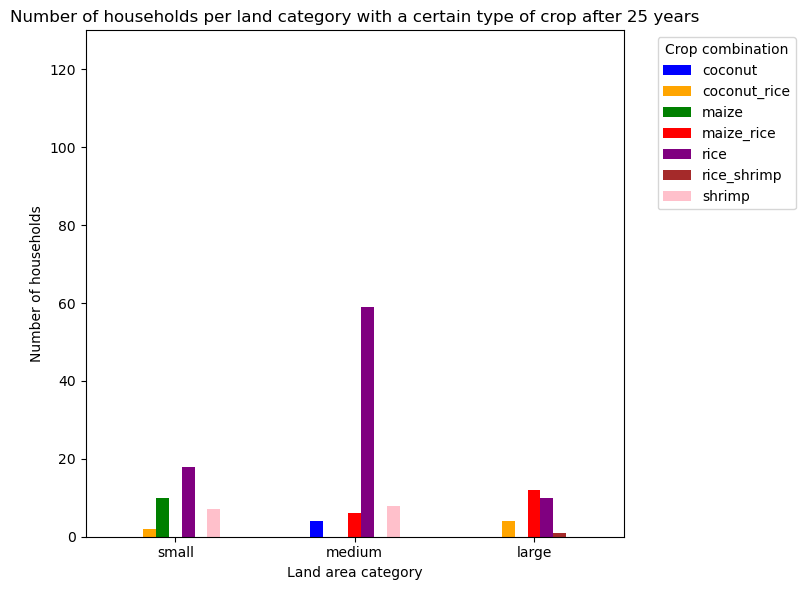

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Stap 1: Land area categoriseren
bins = [0, 0.5, 2, 5]
labels = ['small', 'medium', 'large']
df299['land_category'] = pd.cut(df299['land_area'], bins=bins, labels=labels, include_lowest=True)

# Stap 2: Maak een functie om gewassen te combineren
def combine_crops(row):
    crops = []
    if pd.notna(row['Rice']) and row['Rice'] > 0:
        crops.append('rice')
    if pd.notna(row['Maize']) and row['Maize'] > 0:
        crops.append('maize')
    if pd.notna(row['Shrimp']) and row['Shrimp'] > 0:
        crops.append('shrimp')
    if pd.notna(row['Coconut']) and row['Coconut'] > 0:
        crops.append('coconut')
    if len(crops) == 0:
        return 'none'
    else:
        return '_'.join(sorted(crops))

df299['crop_category'] = df299.apply(combine_crops, axis=1)

# Stap 3: Tel per land_category en crop_category het aantal huishoudens
counts = df299.groupby(['land_category', 'crop_category']).size().unstack(fill_value=0)

# Stap 4: Definieer kleuren voor bekende crop-combinaties
colors = {
    'coconut': 'blue',
    'coconut_rice': 'orange',
    'maize': 'green',
    'maize_rice': 'red',
    'rice': 'purple',
    'rice_shrimp': 'brown',
    'shrimp': 'pink',
    'none': 'gray'  # eventueel, voor huishoudens zonder gewassen
}

# Zorg dat kleuren overeenkomen met de kolommen in 'counts'
plot_colors = [colors.get(col, 'gray') for col in counts.columns]

# Stap 5: Plotten
counts.plot(kind='bar', stacked=False, figsize=(8,6), color=plot_colors)

plt.title('Number of households per land category with a certain type of crop after 25 years')
plt.xlabel('Land area category')
plt.ylabel('Number of households')
plt.xticks(rotation=0)
plt.ylim(0, 130)
plt.legend(title='Crop combination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


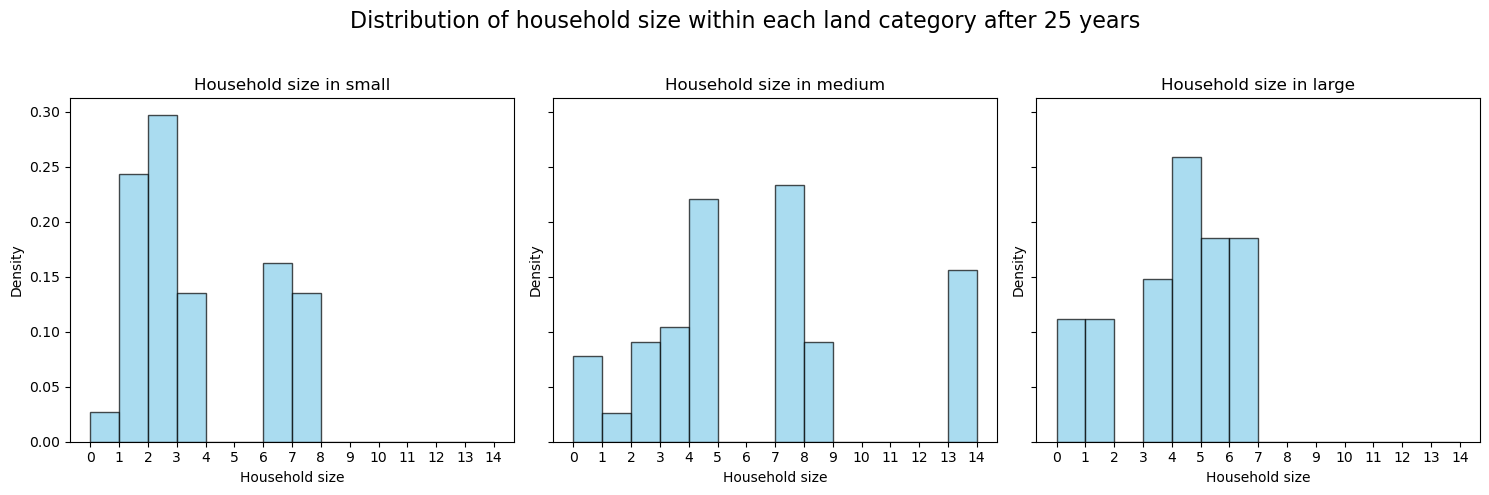

In [43]:
import matplotlib.pyplot as plt

categories = ['small', 'medium', 'large']  # Je land_area categorieën

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # 3 subplots in één rij

for ax, category in zip(axs, categories):
    subset = df299[df299['land_category'] == category]
    ax.hist(subset['household_size'], bins=range(0, max(df299['household_size'])+2), alpha=0.7, color='skyblue', edgecolor='black', density=True)
    ax.set_title(f'Household size in {category}')
    ax.set_xlabel('Household size')
    ax.set_ylabel('Density')
    ax.set_xticks(range(0, max(df299['household_size'])+2))

fig.suptitle('Distribution of household size within each land category after 25 years', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # ruimte laten voor suptitle
plt.show()


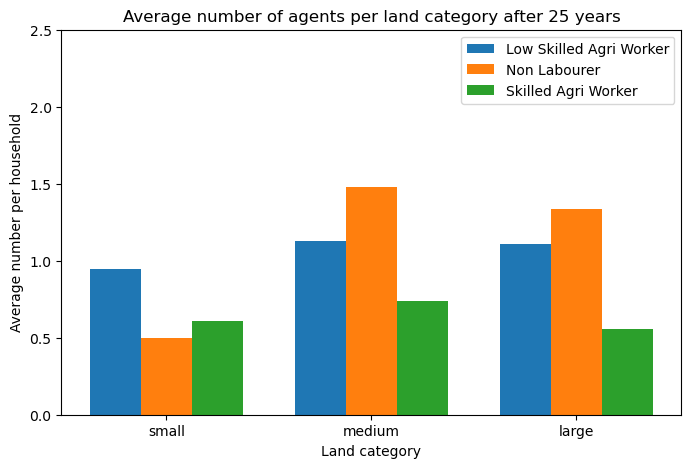

In [32]:
import pandas as pd

import pandas as pd

# Eerst None vervangen door 'non labourer'
df299['agent_occupation'] = df299['agent_occupation'].fillna('non labourer')

# Dan groeperen en tellen per land_area en agent_occupation
occupation_counts = df299.groupby(['land_area', 'agent_occupation']).size().unstack(fill_value=0).reset_index()

occupation_counts


bins = [0, 0.5, 2, 5]
labels = ['small', 'medium', 'large']
occupation_counts['land_category'] = pd.cut(occupation_counts['land_area'], bins=bins, labels=labels, include_lowest=True)

# 2. Groepeer op land_category en bereken het gemiddelde per occupation
avg_by_category = occupation_counts.groupby('land_category')[['low_skilled_agri_worker', 'non labourer', 'skilled_agri_worker']].mean().reset_index()

import matplotlib.pyplot as plt
import numpy as np

# Voorbeeld data
categories = avg_by_category['land_category'].astype(str).tolist()
low_skilled = avg_by_category['low_skilled_agri_worker'].tolist()
non_labourer = avg_by_category['non labourer'].tolist()
skilled = avg_by_category['skilled_agri_worker'].tolist()

x = np.arange(len(categories))  # de posities van de categorieën op de x-as
width = 0.25  # breedte van de balken

fig, ax = plt.subplots(figsize=(8,5))

# Balken tekenen
rects1 = ax.bar(x - width, low_skilled, width, label='Low Skilled Agri Worker')
rects2 = ax.bar(x, non_labourer, width, label='Non Labourer')
rects3 = ax.bar(x + width, skilled, width, label='Skilled Agri Worker')

# Labels en titel
ax.set_xlabel('Land category')
ax.set_ylabel('Average number per household')
ax.set_title('Average number of agents per land category after 25 years')
ax.set_xticks(x)
ax.set_ylim(0,2.5)
ax.set_xticklabels(categories)
ax.legend()

plt.show()




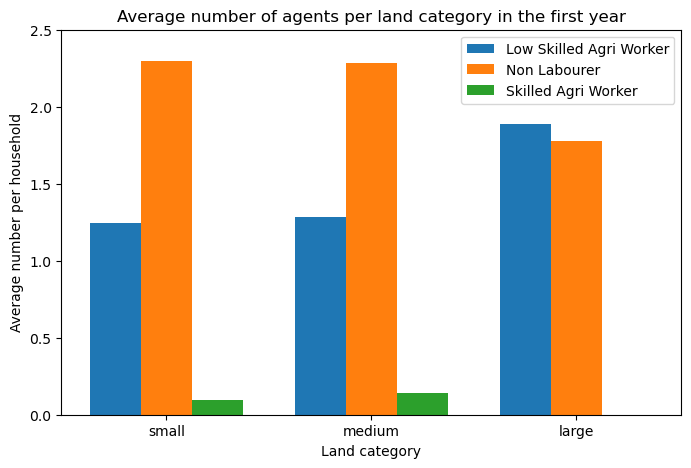

In [38]:
df1 = model.data_at_step_1
import pandas as pd
crop_df = df1['crops_and_land'].apply(pd.Series)
occupation_df = df1['agent_occupation'].apply(pd.Series)

# Voeg deze nieuwe kolommen toe aan je dataframe
df1 = pd.concat([df1, crop_df], axis=1)


# Eerst None vervangen door 'non labourer'
df1['agent_occupation'] = df1['agent_occupation'].fillna('non labourer')

# Dan groeperen en tellen per land_area en agent_occupation
occupation_counts = df1.groupby(['land_area', 'agent_occupation']).size().unstack(fill_value=0).reset_index()

occupation_counts


bins = [0, 0.5, 2, 5]
labels = ['small', 'medium', 'large']
occupation_counts['land_category'] = pd.cut(occupation_counts['land_area'], bins=bins, labels=labels, include_lowest=True)

# 2. Groepeer op land_category en bereken het gemiddelde per occupation
avg_by_category = occupation_counts.groupby('land_category')[['low_skilled_agri_worker', 'non labourer', 'skilled_agri_worker']].mean().reset_index()

import matplotlib.pyplot as plt
import numpy as np

# Voorbeeld data
categories = avg_by_category['land_category'].astype(str).tolist()
low_skilled = avg_by_category['low_skilled_agri_worker'].tolist()
non_labourer = avg_by_category['non labourer'].tolist()
skilled = avg_by_category['skilled_agri_worker'].tolist()

x = np.arange(len(categories))  # de posities van de categorieën op de x-as
width = 0.25  # breedte van de balken

fig, ax = plt.subplots(figsize=(8,5))

# Balken tekenen
rects1 = ax.bar(x - width, low_skilled, width, label='Low Skilled Agri Worker')
rects2 = ax.bar(x, non_labourer, width, label='Non Labourer')
rects3 = ax.bar(x + width, skilled, width, label='Skilled Agri Worker')

# Labels en titel
ax.set_xlabel('Land category')
ax.set_ylabel('Average number per household')
ax.set_title('Average number of agents per land category in the first year')
ax.set_xticks(x)
ax.set_ylim(0,2.5)
ax.set_xticklabels(categories)
ax.legend()

plt.show()





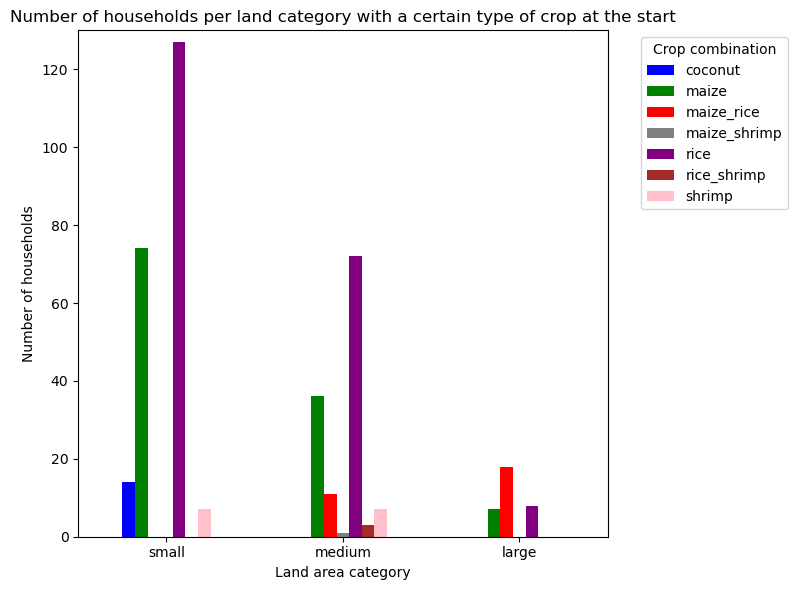

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Stap 1: Land area categoriseren
bins = [0, 0.5, 2, 5]
labels = ['small', 'medium', 'large']
df1['land_category'] = pd.cut(df1['land_area'], bins=bins, labels=labels, include_lowest=True)

# Stap 2: Maak een functie om gewassen te combineren
def combine_crops(row):
    crops = []
    if pd.notna(row['Rice']) and row['Rice'] > 0:
        crops.append('rice')
    if pd.notna(row['Maize']) and row['Maize'] > 0:
        crops.append('maize')
    if pd.notna(row['Shrimp']) and row['Shrimp'] > 0:
        crops.append('shrimp')
    if pd.notna(row['Coconut']) and row['Coconut'] > 0:
        crops.append('coconut')
    if len(crops) == 0:
        return 'none'
    else:
        return '_'.join(sorted(crops))

df1['crop_category'] = df1.apply(combine_crops, axis=1)

# Stap 3: Tel per land_category en crop_category het aantal huishoudens
counts = df1.groupby(['land_category', 'crop_category']).size().unstack(fill_value=0)

# Stap 4: Definieer de kleuren per crop-combinatie
colors = {
    'coconut': 'blue',
    'coconut_rice': 'orange',
    'maize': 'green',
    'maize_rice': 'red',
    'rice': 'purple',
    'rice_shrimp': 'brown',
    'shrimp': 'pink'
}

# Filter kleuren op de kolommen die daadwerkelijk in de data zitten
plot_colors = [colors.get(col, 'gray') for col in counts.columns]

# Stap 5: Plotten
counts.plot(kind='bar', stacked=False, figsize=(8,6), color=plot_colors)

plt.title('Number of households per land category with a certain type of crop at the start')
plt.xlabel('Land area category')
plt.ylabel('Number of households')
plt.ylim(0, 130)
plt.xticks(rotation=0)
plt.legend(title='Crop combination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


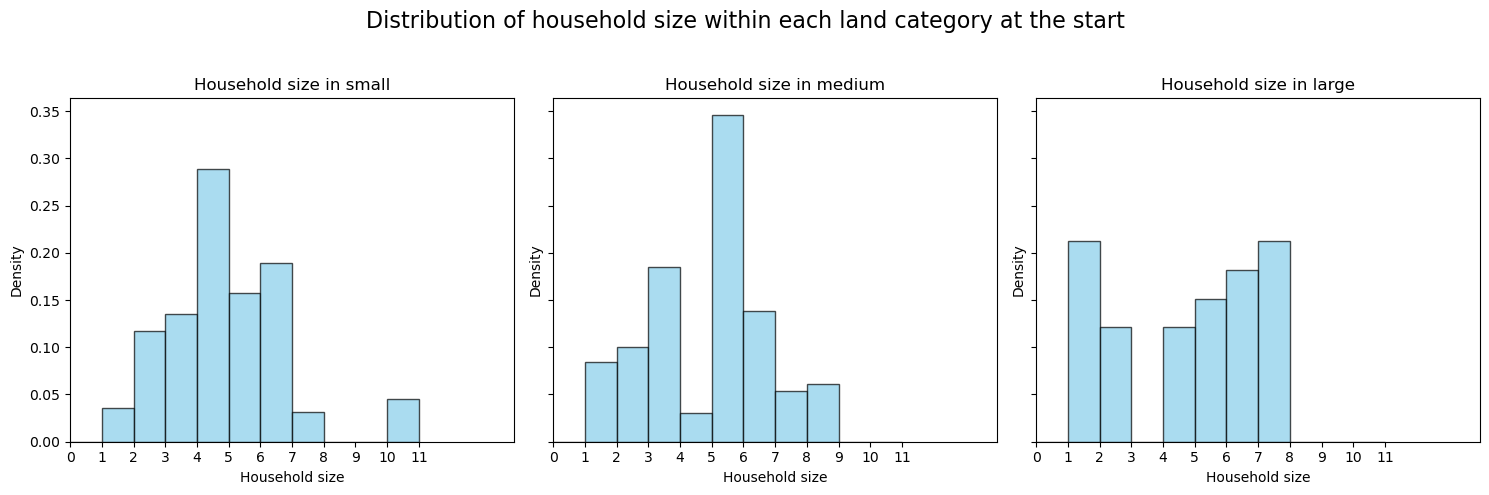

In [44]:
import matplotlib.pyplot as plt

categories = ['small', 'medium', 'large']  # Je land_area categorieën

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # 3 subplots in één rij

for ax, category in zip(axs, categories):
    subset = df1[df1['land_category'] == category]
    ax.hist(subset['household_size'], bins=range(0, max(df1['household_size'])+2), alpha=0.7, color='skyblue', edgecolor='black', density=True)
    ax.set_title(f'Household size in {category}')
    ax.set_xlabel('Household size')
    ax.set_ylabel('Density')
    ax.set_xticks(range(0, max(df1['household_size'])+2))
    ax.set_xlim(0,14)

fig.suptitle('Distribution of household size within each land category at the start', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # ruimte laten voor suptitle
plt.show()


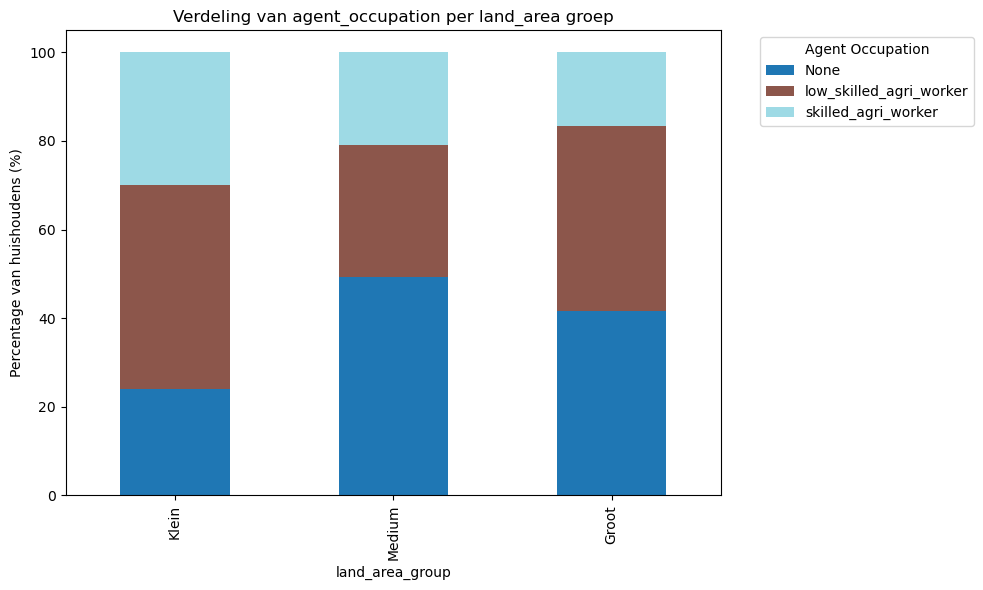

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Land_area categoriseren
bins = [0, 1, 3, df['land_area'].max()]
labels = ['Klein', 'Medium', 'Groot']
df['land_area_group'] = pd.cut(df['land_area'], bins=bins, labels=labels, include_lowest=True)

# 2. Tellen per groep en occupation
counts = df.groupby(['land_area_group', 'agent_occupation']).size().reset_index(name='count')

# 3. Bereken totaal per land_area_group
totals = counts.groupby('land_area_group')['count'].transform('sum')

# 4. Percentage per occupation binnen land_area_group
counts['percentage'] = counts['count'] / totals * 100

# 5. Pivot voor plot (agent_occupation kolommen, land_area_group rijen)
pivot_df = counts.pivot(index='land_area_group', columns='agent_occupation', values='percentage').fillna(0)

# 6. Plot een 100% stacked barplot
pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.ylabel('Percentage van huishoudens (%)')
plt.title('Verdeling van agent_occupation per land_area groep')
plt.legend(title='Agent Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


                   rice     maize    shrimp   coconut
land_category                                        
Large          2.789296  1.130594  1.876902  0.562371
Middle         1.321898  0.258262  1.123750  1.137883
Small          0.407744  0.393631  0.403904  0.400309


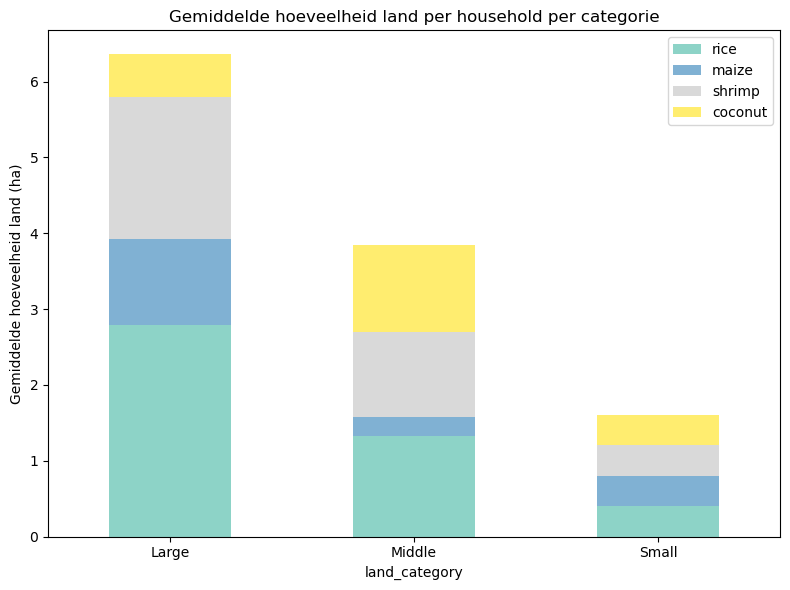

In [14]:
# Stap 1: Categorie toevoegen
def categorize_land(area):
    if area <= 0.5:
        return 'Small'
    elif area <= 2:
        return 'Middle'
    else:
        return 'Large'

df['land_category'] = df['land_area'].apply(categorize_land)

mean_land_per_crop = df.groupby('land_category')[['rice', 'maize', 'shrimp', 'coconut']].mean()
print(mean_land_per_crop)

mean_land_per_crop.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set3')
plt.ylabel('Gemiddelde hoeveelheid land (ha)')
plt.title('Gemiddelde hoeveelheid land per household per categorie')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




In [5]:
df1 = df[['land_area', 'rice', 'maize', 'shrimp', 'coconut']]
df1.groupby('land_area')
df1

,land_area,rice,maize,shrimp,coconut
0,3.203438,2.732858,0.470579,NaN,NaN
1,3.203438,2.732858,0.470579,NaN,NaN
2,3.203438,2.732858,0.470579,NaN,NaN
3,3.203438,2.732858,0.470579,NaN,NaN
4,3.203438,2.732858,0.470579,NaN,NaN
...,...,...,...,...,...
136,1.677074,1.216301,0.460773,NaN,NaN
137,0.341158,0.170579,NaN,NaN,0.341158
138,3.282464,2.965225,0.317239,NaN,NaN
139,3.282464,2.965225,0.317239,NaN,NaN


In [18]:
import numpy as np

# 1. Maak een nieuwe kolom 'land_category' op basis van land_area
def categorize_land(area):
    if area <= 0.5:
        return 'small'
    elif 0.5 < area <= 2:
        return 'middle'
    elif 2 < area <= 5:
        return 'large'
    else:
        return np.nan  # of 'unknown' als je wil

df1['land_category'] = df1['land_area'].apply(categorize_land)

# 2. Overzicht van hoeveelheid land per crop per categorie
# Omdat sommige waarden NaN zijn, vullen we die eerst op met 0 (geen land van die crop)
df1[['rice', 'maize', 'shrimp', 'coconut']] = df[['rice', 'maize', 'shrimp', 'coconut']].fillna(0)

# 3. Groepeer op land_category en sommeer land per crop
summary = df1.groupby('land_category')[['rice', 'maize', 'shrimp', 'coconut']].mean()
print(summary)

# 4. Of als je wilt zien of households meerdere crop types hebben (meer dan 1 crop met land > 0)
df1['num_crops'] = (df1[['rice', 'maize', 'shrimp', 'coconut']] > 0).sum(axis=1)
df1['multiple_crops'] = df1['num_crops'] > 1

# 5. Groeperen op land_category en tellen hoeveel households meerdere crops hebben
multi_crop_counts = df1.groupby('land_category')['multiple_crops'].sum()
print(multi_crop_counts)


                   rice     maize    shrimp   coconut
land_category                                        
large          2.789296  0.502486  0.069515  0.083314
middle         1.115888  0.033540  0.116753  0.059111
small          0.220402  0.106387  0.076414  0.021638
land_category
large     17
middle     6
small      2
Name: multiple_crops, dtype: int64


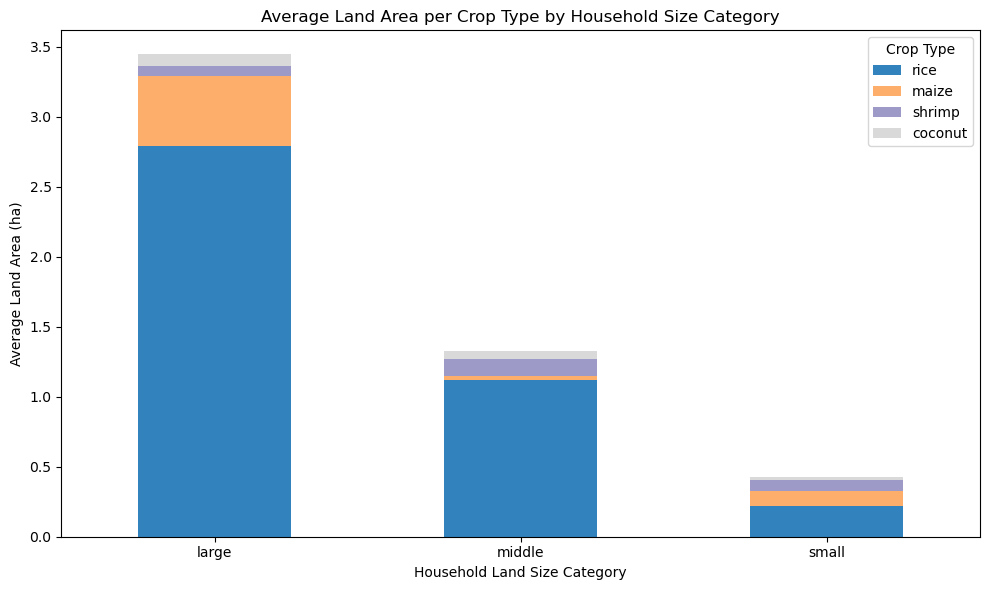

In [16]:
import matplotlib.pyplot as plt

# Vul NaN met 0 (geen land van dat type)
df1[['rice', 'maize', 'shrimp', 'coconut']] = df1[['rice', 'maize', 'shrimp', 'coconut']].fillna(0)

# Groepeer per categorie en bereken gemiddelde land per crop
mean_land = df1.groupby('land_category')[['rice', 'maize', 'shrimp', 'coconut']].mean()

# Plot stacked bar
mean_land.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')

plt.title('Average Land Area per Crop Type by Household Size Category')
plt.xlabel('Household Land Size Category')
plt.ylabel('Average Land Area (ha)')
plt.xticks(rotation=0)
plt.legend(title='Crop Type')
plt.tight_layout()
plt.show()


In [8]:
df = initial_model_state.get_household_member_counts()
df

AttributeError: 'RiverDeltaModel' object has no attribute 'get_household_member_counts'

KeyError: 'household_type'

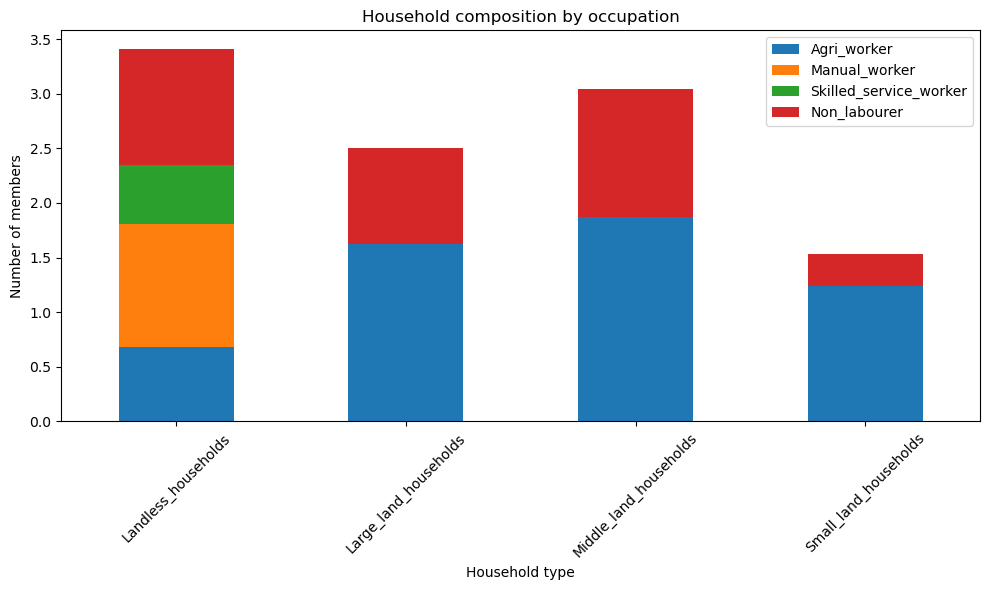

In [9]:
df = model.get_household_member_counts()

# Groepeer op household_type
grouped = df.groupby("household_type").mean()

# Combineer klasses voor de plot
grouped["Agri_worker"] = grouped["Low_skilled_agri_worker"] + grouped["Skilled_agri_worker"]
grouped["Manual_worker"] = grouped["Low_skilled_nonAgri"] + grouped["Manual_worker"] + grouped["Other"]
grouped["Skilled_service_worker"] = grouped["Skilled_service_worker"]
grouped["Non_labourer"] = grouped["Non_labourer"]

# Selecteer alleen gecombineerde kolommen voor de plot
plot_data = grouped[["Agri_worker", "Manual_worker", "Skilled_service_worker", "Non_labourer"]]

# Maak de barplot
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Household composition by occupation")
plt.xlabel("Household type")
plt.ylabel("Number of members")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


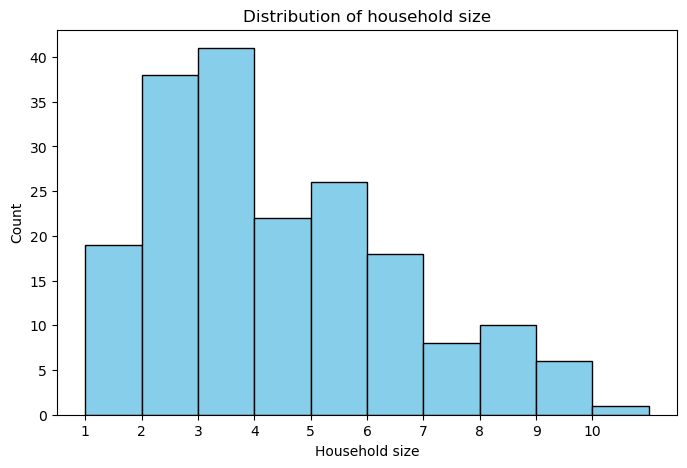

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['household_size'], bins=range(1, df['household_size'].max() + 2), 
         color='skyblue', edgecolor='black')
plt.title("Distribution of household size")
plt.xlabel("Household size")
plt.ylabel("Count")
plt.xticks(range(1, df['household_size'].max() + 1))
plt.show()


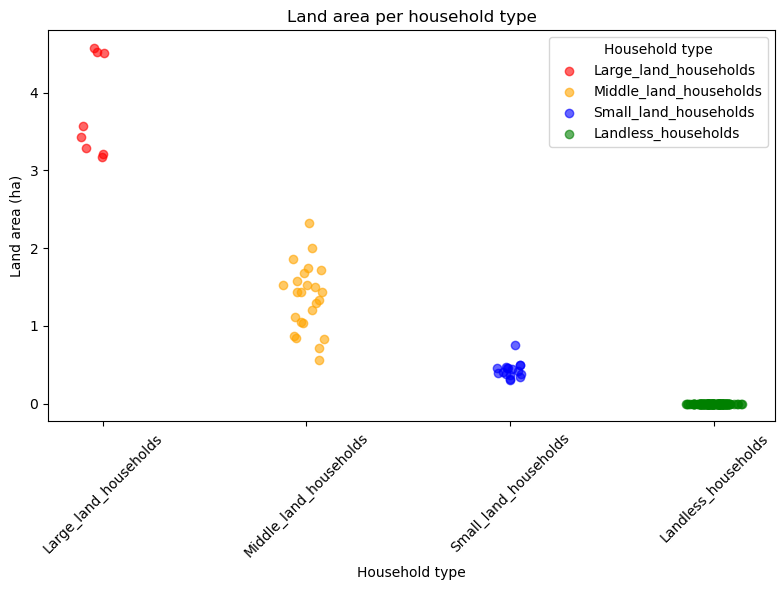

In [10]:
import matplotlib.pyplot as plt
import numpy as np

household_types = df['household_type'].unique()
color_map = {
    "Small_land_households": "blue",
    "Middle_land_households": "orange",
    "Large_land_households": "red",
    "Landless_households": "green"
}

plt.figure(figsize=(8,6))

for i, h_type in enumerate(household_types):
    subset = df[df['household_type'] == h_type]
    # Jitter: kleine random offset voor x zodat punten niet exact op dezelfde plek liggen
    x = np.random.normal(i, 0.05, size=len(subset))
    y = subset['land_area']
    plt.scatter(x, y, alpha=0.6, color=color_map.get(h_type, "gray"), label=h_type)

plt.xticks(range(len(household_types)), household_types, rotation=45)
plt.xlabel("Household type")
plt.ylabel("Land area (ha)")
plt.title("Land area per household type")
plt.legend(title="Household type")
plt.tight_layout()
plt.show()


In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Savings Rice small,Yield Rice small,Income Rice small,Wage costs Rice small,Debt ratio Rice small,Count Rice small,Savings Rice medium,Yield Rice medium,Income Rice medium,Wage costs Rice medium,...,Debt ratio Shrimp large,Count Shrimp large,Number_of_wage_workers,Income_agri_wage,Income_service_worker,Savings_landless_hh,Average_livelihood,Migrated_households,Migrated_individuals,Total_number_nonfarmers
0,2.000000e+07,NaN,NaN,NaN,NaN,43,2.000000e+07,NaN,NaN,NaN,...,NaN,1,NaN,0.000000,4.200000e+06,1.000000e+06,None,0,0,404
1,2.186668e+07,2353.307163,7.731143e+06,722790.697674,NaN,43,3.883997e+07,7518.894549,2.470126e+07,6.751818e+06,...,NaN,1,22.614458,299798.994975,8.400000e+06,1.000000e+06,None,0,0,404
2,2.186668e+07,2353.307163,7.731143e+06,722790.697674,NaN,43,3.883997e+07,7518.894549,2.470126e+07,6.751818e+06,...,NaN,1,22.614458,299798.994975,1.260000e+07,1.000000e+06,None,0,0,404
3,2.186668e+07,2353.307163,7.731143e+06,722790.697674,NaN,43,3.883997e+07,7518.894549,2.470126e+07,6.751818e+06,...,NaN,1,30.923729,430603.015075,1.680000e+07,2.180303e+07,None,0,0,404
4,2.186668e+07,2353.307163,7.731143e+06,722790.697674,NaN,43,3.883997e+07,7518.894549,2.470126e+07,6.751818e+06,...,NaN,1,30.923729,430603.015075,2.100000e+07,2.180303e+07,None,0,0,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.081168e+09,2427.266326,7.956994e+06,794266.666667,0.0,12,2.557505e+09,7596.396518,2.491475e+07,7.113867e+06,...,0.0,1,29.952381,352240.000000,2.019652e+08,3.017134e+09,None,79,20,486
321,1.081168e+09,2427.266326,7.956994e+06,794266.666667,0.0,12,2.557505e+09,7596.396518,2.491475e+07,7.113867e+06,...,0.0,1,30.920635,404649.411765,2.038734e+08,3.017134e+09,None,79,20,486
322,1.091898e+09,2427.266326,7.956994e+06,794266.666667,0.0,12,2.577749e+09,7596.396518,2.491475e+07,7.113867e+06,...,0.0,1,35.936508,585035.294118,2.057815e+08,3.017134e+09,None,79,20,486
323,1.091898e+09,2427.266326,7.956994e+06,794266.666667,0.0,12,2.577749e+09,7596.396518,2.491475e+07,7.113867e+06,...,0.0,1,35.936508,585035.294118,2.076896e+08,3.017134e+09,None,79,20,486


In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()

agent_savings = agent_data[agent_data['Savings'].notna()]
agent_savings


Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
1    10001            Rice        medium  2.000000e+07             NaN   
     10002            Rice         small  2.000000e+07             NaN   
     10003            Rice         small  2.000000e+07             NaN   
     10004    Annual crops         large  2.000000e+07             NaN   
     10005    Annual crops        medium  2.000000e+07             NaN   
...                    ...           ...           ...             ...   
300  12742            None          None  3.403979e+09             0.0   
     12743            None          None  6.585259e+09             0.0   
     12744            None          None  3.236433e+09             0.0   
     12745            None          None  1.305453e+09             0.0   
     12746            None          None  3.130666e+09             0.0   

              Number_of_wage_workers  Debt ratio  ww_costs_rice  \
Step AgentID                                                      
1    10001                       NaN         NaN            NaN   
     10002                       NaN         NaN            NaN   
     10003                       NaN         NaN            NaN   
     10004                       NaN         NaN            NaN   
     10005                       NaN         NaN            NaN   
...                              ...         ...            ...   
300  12742                       NaN         NaN            NaN   
     12743                       NaN         NaN            NaN   
     12744                       NaN         NaN            NaN   
     12745                       NaN         NaN            NaN   
     12746                       NaN         NaN            NaN   

              ww_costs_maize  ww_costs_coconut  ww_costs_shrimp  \
Step AgentID                                                      
1    10001               NaN               NaN              NaN   
     10002               NaN               NaN              NaN   
     10003               NaN               NaN              NaN   
     10004               NaN               NaN              NaN   
     10005               NaN               NaN              NaN   
...                      ...               ...              ...   
300  12742               NaN               NaN              NaN   
     12743               NaN               NaN              NaN   
     12744               NaN               NaN              NaN   
     12745               NaN               NaN              NaN   
     12746               NaN               NaN              NaN   

              total_income_rice  total_income_maize  total_income_coconut  \
Step AgentID                                                                
1    10001                  NaN                 NaN                   NaN   
     10002                  NaN                 NaN                   NaN   
     10003                  NaN                 NaN                   NaN   
     10004                  NaN                 NaN                   NaN   
     10005                  NaN                 NaN                   NaN   
...                         ...                 ...                   ...   
300  12742                  NaN                 NaN                   NaN   
     12743                  NaN                 NaN                   NaN   
     12744                  NaN                 NaN                   NaN   
     12745                  NaN                 NaN                   NaN   
     12746                  NaN                 NaN                   NaN   

              total_income_shrimp  yield_rice  yield_maize  yield_coconut  \
Step AgentID                                                                
1    10001                    NaN         NaN          NaN            NaN   
     10002                    NaN         NaN          NaN            NaN   


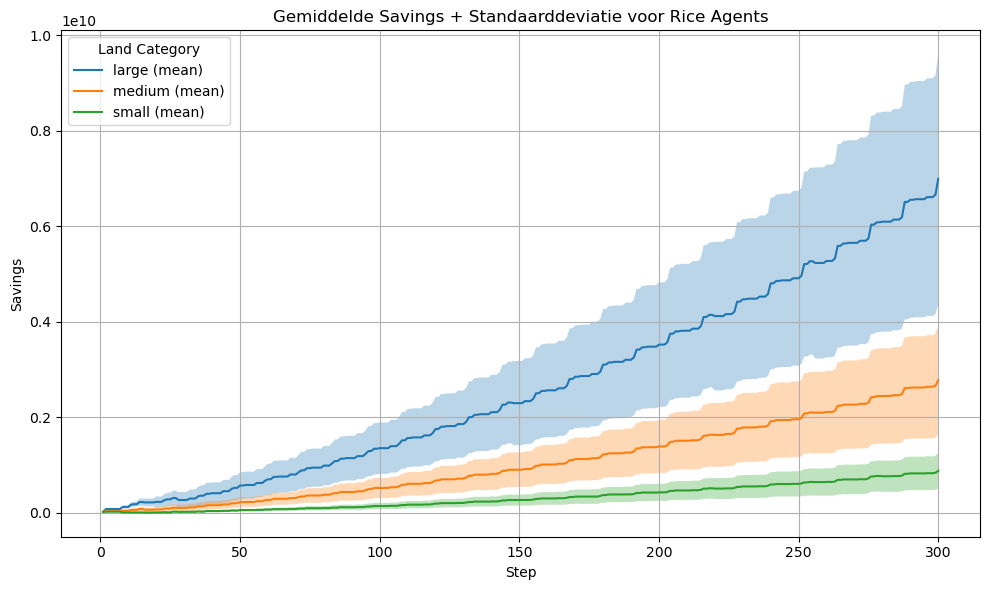

In [5]:
rice_income_data = agent_data
import matplotlib.pyplot as plt
import pandas as pd


rice_income_data = rice_income_data.reset_index()

rice_df = rice_income_data[rice_income_data["Crop_type"] == "Rice"]

mean_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].mean().unstack()
std_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].std().unstack()

plt.figure(figsize=(10,6))
for category in mean_savings.columns:
    mean = mean_savings[category]
    std = std_savings[category]
    
    plt.plot(mean.index, mean.values, label=f"{category} (mean)")
    plt.fill_between(mean.index, mean - std, mean + std, alpha=0.3)

plt.title("Gemiddelde Savings + Standaarddeviatie voor Rice Agents")
plt.xlabel("Step")
plt.ylabel("Savings")
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()




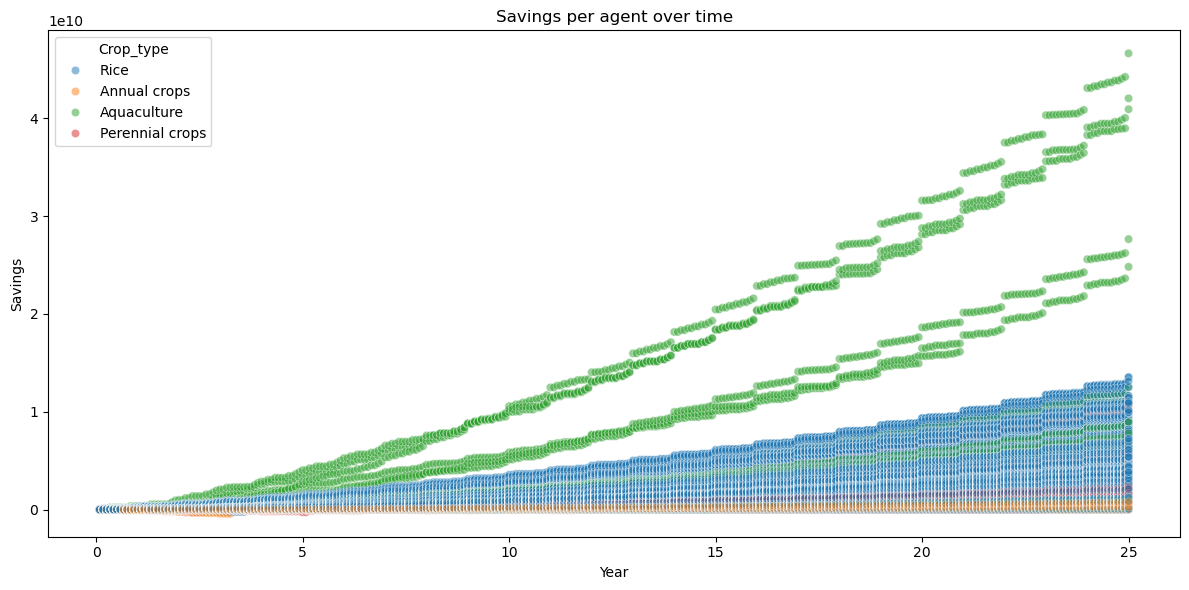

In [6]:
# agent_savings = agent_savings[agent_savings['Crop_type'].notna()]


agent_savings = agent_savings.reset_index() 
agent_savings['Year'] = agent_savings['Step'] / 12

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=agent_savings, x='Year', y='Savings', hue='Crop_type', alpha=0.5)
plt.title("Savings per agent over time")
plt.ylabel("Savings")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

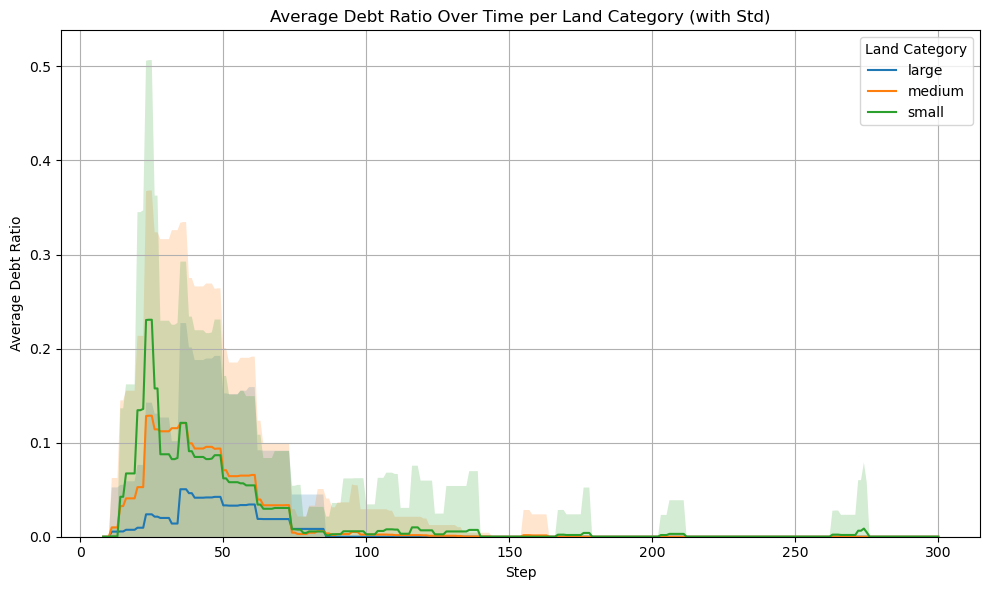

In [7]:
debt_data = agent_data
debt_data = debt_data[debt_data['Debt ratio'].notna()]
import matplotlib.pyplot as plt

# Gemiddelde en standaarddeviatie berekenen
grouped = debt_data.groupby(['Step', 'Land_category'])['Debt ratio']
mean_debt = grouped.mean().unstack()
std_debt = grouped.std().unstack()

# Plot
plt.figure(figsize=(10, 6))

for category in mean_debt.columns:
    plt.plot(mean_debt.index, mean_debt[category], label=category)
    plt.fill_between(
        mean_debt.index,
        mean_debt[category] - std_debt[category],
        mean_debt[category] + std_debt[category],
        alpha=0.2
    )

plt.title("Average Debt Ratio Over Time per Land Category (with Std)")
plt.xlabel("Step")
plt.ylabel("Average Debt Ratio")
plt.ylim(bottom=0)
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births,Rice agents,Annual crops agents,Low_skilled_agri,Skilled_agri
0,0.000000,10000,0,0,0,0,0,692,321,1742,59
1,0.000000,10000,0,0,0,0,0,692,321,1742,59
2,0.000000,10000,0,0,0,0,0,692,321,1742,59
3,0.000000,10000,0,0,0,0,0,692,321,1742,59
4,0.000000,10000,0,0,0,0,0,692,321,1742,59
...,...,...,...,...,...,...,...,...,...,...,...
320,0.700743,7249,784,3131,290,1137,1800,358,75,797,717
321,0.701145,7249,784,3131,290,1137,1800,358,75,797,717
322,0.701145,7248,784,3131,291,1137,1800,358,75,797,716
323,0.701145,7248,784,3131,291,1137,1800,358,75,797,716


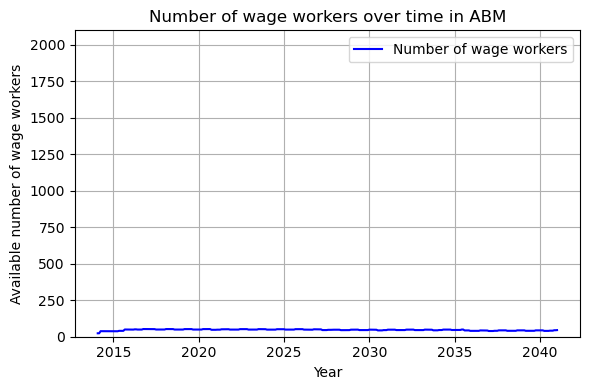

In [5]:

agri_workers = model_data.copy()

# Voeg kolom toe
# agri_workers['Total_wage_workers'] = agri_workers['Low_skilled_agri'] + agri_workers['Skilled_agri']

# Maak een jarenreeks van 2014 tot 2039
years = 2014 + (agri_workers.index * (25 / 300))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(years, agri_workers['Number_of_wage_workers'], label='Number of wage workers', color='blue')
plt.xlabel('Year')
plt.ylabel('Available number of wage workers')
plt.title('Number of wage workers over time in ABM')
plt.ylim(0, 2100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



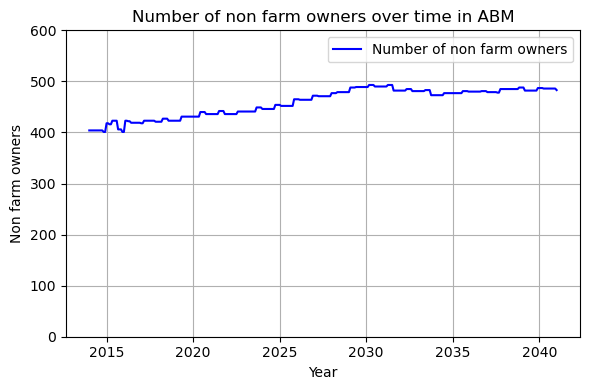

In [6]:

total_nonfarm = model_data.copy()

# Voeg kolom toe
# agri_workers['Total_wage_workers'] = agri_workers['Low_skilled_agri'] + agri_workers['Skilled_agri']

# Maak een jarenreeks van 2014 tot 2039
years = 2014 + (total_nonfarm.index * (25 / 300))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(years, total_nonfarm['Total_number_nonfarmers'], label='Number of non farm owners', color='blue')
plt.xlabel('Year')
plt.ylabel('Non farm owners')
plt.title('Number of non farm owners over time in ABM')
plt.ylim(0, 600)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

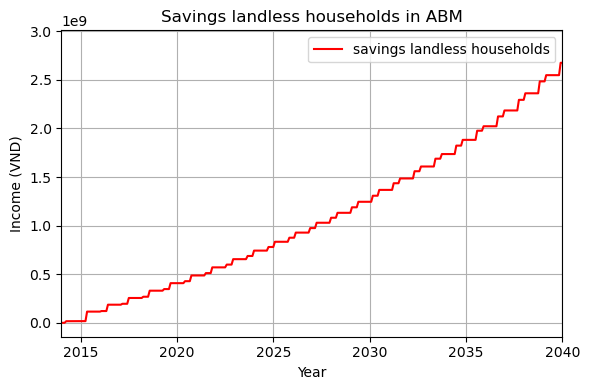

In [6]:
import matplotlib.pyplot as plt

savings_landless = model_data.copy()
years = savings_landless.index / 12 + 2014  # 0 wordt 2014, etc.

start_households = model.start_households  

plt.figure(figsize=(6, 4))

plt.plot(years, savings_landless['Savings_landless_hh'], label='savings landless households', color='red')

plt.xlabel('Year')
plt.ylabel('Income (VND)')
plt.title('Savings landless households in ABM')
plt.xlim(2014, 2040)  # Beperk x-as tussen 2014 en 2040
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

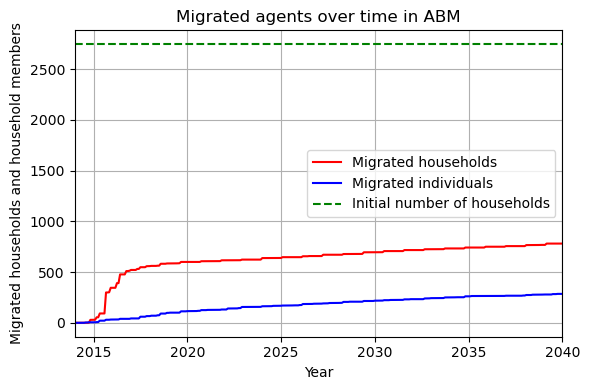

In [10]:
import matplotlib.pyplot as plt

debt_model_data = model_data.copy()
years = debt_model_data.index / 12 + 2014  # 0 wordt 2014, etc.

start_households = model.start_households  

plt.figure(figsize=(6, 4))

plt.plot(years, debt_model_data['Migrated_households'], label='Migrated households', color='red')
plt.plot(years, debt_model_data['Migrated_individuals'], label='Migrated individuals', color='blue')

plt.axhline(y=start_households, color='green', linestyle='--', label='Initial number of households')

plt.xlabel('Year')
plt.ylabel('Migrated households and household members')
plt.title('Migrated agents over time in ABM')
plt.xlim(2014, 2040)  # Beperk x-as tussen 2014 en 2040
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



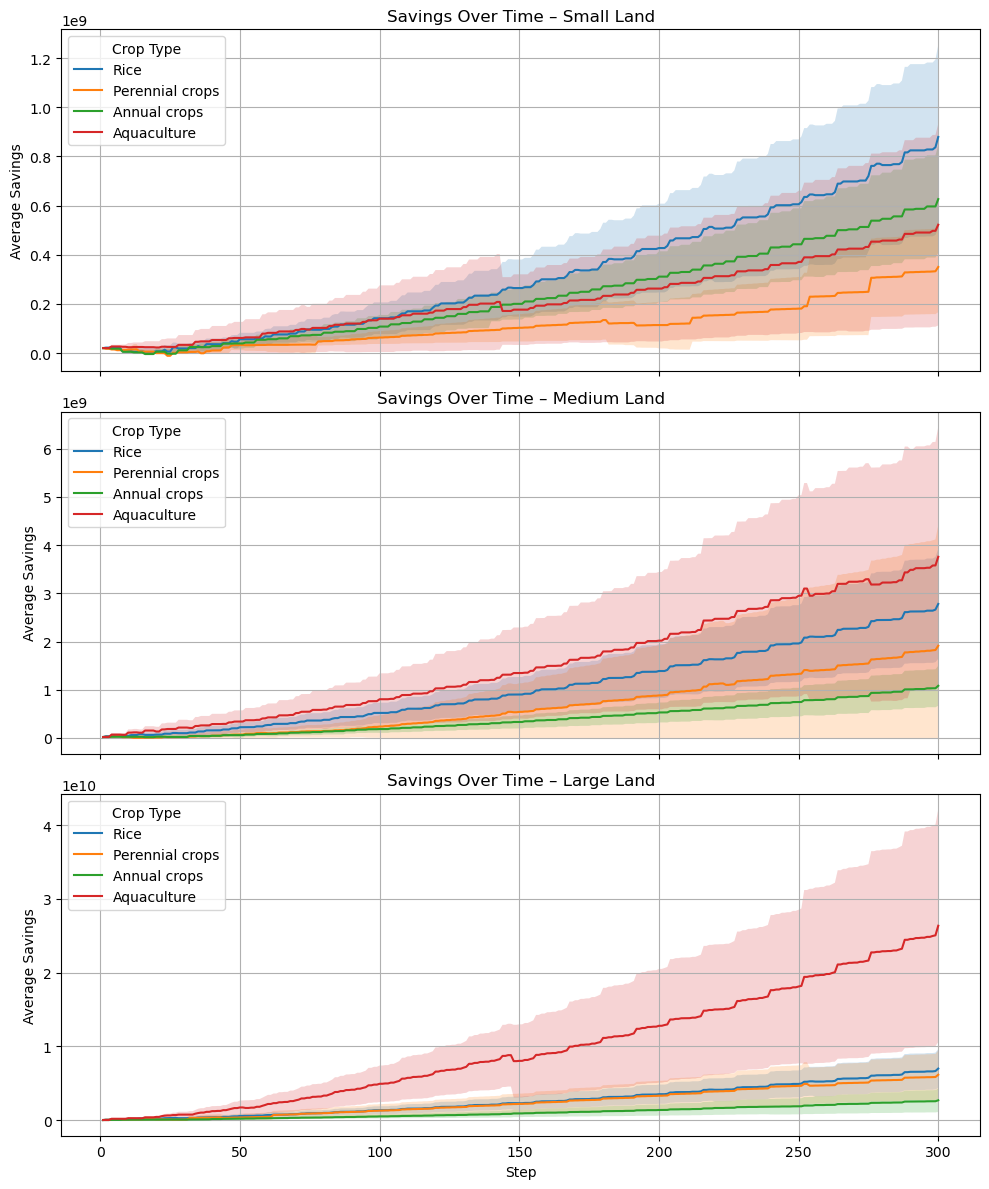

In [11]:
import matplotlib.pyplot as plt
import numpy as np

df_savings = agent_data
df_filtered = df_savings.dropna(subset=['Crop_type', 'Land_category', 'Savings'])

land_categories = ['small', 'medium', 'large']
crop_types = ['Rice', 'Perennial crops', 'Annual crops', 'Aquaculture']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

for i, land in enumerate(land_categories):
    ax = axes[i]
    df_land = df_filtered[df_filtered['Land_category'] == land]
    
    for crop in crop_types:
        df_crop = df_land[df_land['Crop_type'] == crop]
        if df_crop.empty:
            continue

        grouped = df_crop.groupby('Step')['Savings']
        mean = grouped.mean()
        std = grouped.std()

        ax.plot(mean.index, mean.values, label=crop)
        ax.fill_between(
            mean.index,
            np.maximum(0, mean - std),  
            mean + std,
            alpha=0.2
        )
    
    ax.set_title(f"Savings Over Time – {land.capitalize()} Land")
    ax.set_ylabel("Average Savings")
    ax.grid(True)
    ax.legend(title="Crop Type")

axes[-1].set_xlabel("Step")
plt.tight_layout()
plt.show()



In [12]:
ww_data = agent_data
ww_data1 = ww_data[ww_data['Number_of_wage_workers'].notna()]
ww_data1

Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
2    10001            Rice        medium  2.573309e+07             NaN   
     10002            Rice         small  2.131564e+07             NaN   
     10003            Rice         small  2.247351e+07             NaN   
     10007            Rice         small  1.863862e+07             NaN   
     10010            Rice         small  2.240439e+07             NaN   
...                    ...           ...           ...             ...   
300  11093            Rice         small  9.156151e+08             NaN   
     11094            Rice         small  1.291249e+09             NaN   
     11095            Rice        medium  2.107676e+09             NaN   
     11096            Rice         large  3.821299e+09             NaN   
     11097    Annual crops         small  7.906946e+08             NaN   

              Number_of_wage_workers  Debt ratio  ww_costs_rice  \
Step AgentID                                                      
2    10001                       0.0         NaN   0.000000e+00   
     10002                       8.0         NaN   1.680000e+06   
     10003                       0.0         NaN   0.000000e+00   
     10007                       0.0         NaN   0.000000e+00   
     10010                       0.0         NaN   0.000000e+00   
...                              ...         ...            ...   
300  11093                       6.0         0.0   1.248169e+06   
     11094                       0.0         0.0   0.000000e+00   
     11095                      29.0         0.0   6.032817e+06   
     11096                      53.0         0.0   1.102549e+07   
     11097                       2.0         0.0   1.330000e+06   

              ww_costs_maize  ww_costs_coconut  ww_costs_shrimp  \
Step AgentID                                                      
2    10001               NaN               NaN              NaN   
     10002               NaN               NaN              NaN   
     10003               NaN               NaN              NaN   
     10007               NaN               NaN              NaN   
     10010               NaN               NaN              NaN   
...                      ...               ...              ...   
300  11093      2.717173e+06               NaN              NaN   
     11094      2.717173e+06               NaN              NaN   
     11095               NaN               NaN              NaN   
     11096               NaN               NaN              NaN   
     11097      4.160563e+05               NaN              NaN   

              total_income_rice  total_income_maize  total_income_coconut  \
Step AgentID                                                                
2    10001         1.241976e+07                 NaN                   NaN   
     10002         9.221138e+06                 NaN                   NaN   
     10003         5.816838e+06                 NaN                   NaN   
     10007         6.091285e+06                 NaN                   NaN   
     10010         6.966557e+06                 NaN                   NaN   
...                         ...                 ...                   ...   
300  11093         7.702070e+06        8.308910e+06                   NaN   
     11094         7.900531e+06        8.139895e+06                   NaN   
     11095         2.564483e+07                 NaN                   NaN   
     11096         4.391258e+07                 NaN                   NaN   
     11097         8.287006e+06        1.144740e+07                   NaN   

              total_income_shrimp    yield_rice  yield_maize  yield_coconut  \
Step AgentID                                                                  
2    10001                    NaN   3780.489729          NaN            NaN   
     10002                    NaN   2806.851545          NaN           

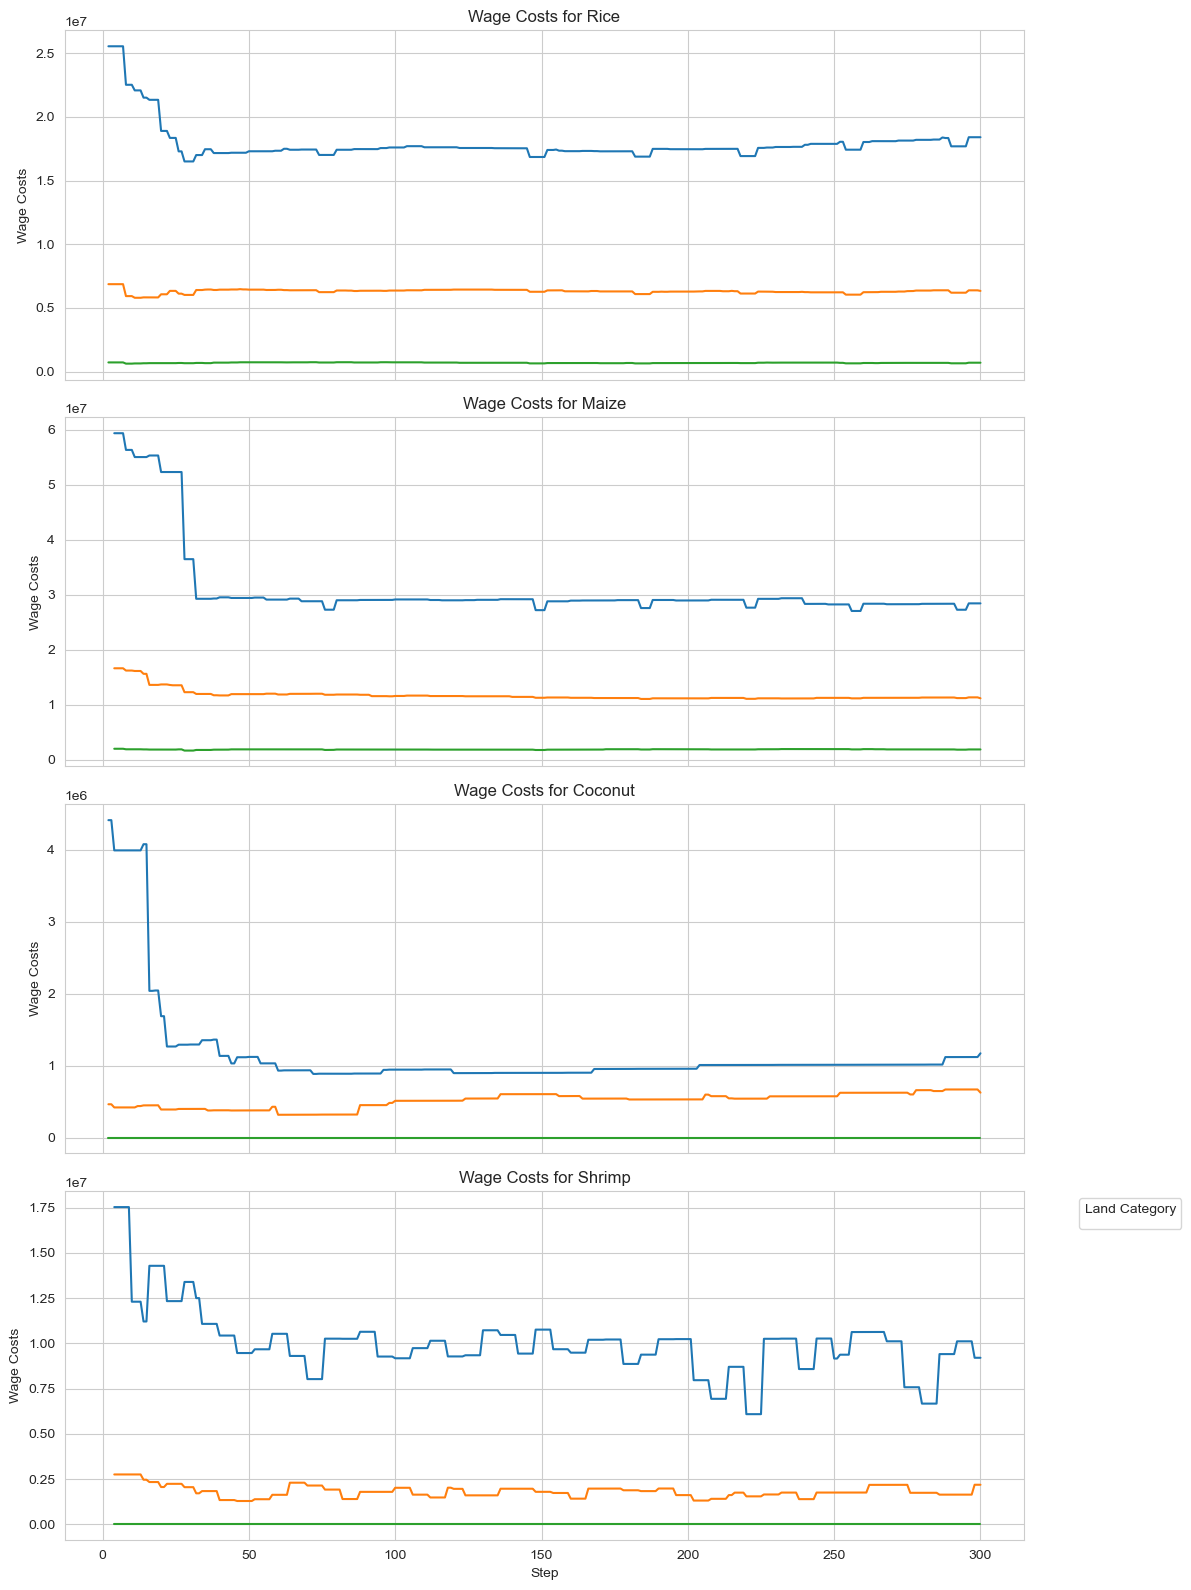

In [13]:

# Zorg dat stijl clean is
sns.set_style("whitegrid")

# Categorieën en bijbehorende kolommen
crops = {
    "Rice": "ww_costs_rice",
    "Maize": "ww_costs_maize",
    "Coconut": "ww_costs_coconut",
    "Shrimp": "ww_costs_shrimp"
}

# Setup voor subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=True)

# Voor elke crop: filter, groepeer en plot
for ax, (crop_name, col_name) in zip(axes, crops.items()):
    # Filter: alleen rijen zonder NaN voor deze crop
    ww_data = ww_data1[ww_data1[col_name].notna()]

    # Groeperen: gemiddeld per Step en Land_category
    ww_data = ww_data.groupby(['Step', 'Land_category'])[col_name].mean().reset_index()

    # Plot
    sns.lineplot(
        data=ww_data,
        x='Step',
        y=col_name,
        hue='Land_category',
        ax=ax,
        legend=False  # Zet alleen bij laatste aan
    )

    ax.set_title(f"Wage Costs for {crop_name}")
    ax.set_ylabel("Wage Costs")
    ax.set_xlabel("Step")

# Legenda in de onderste plot
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, title="Land Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


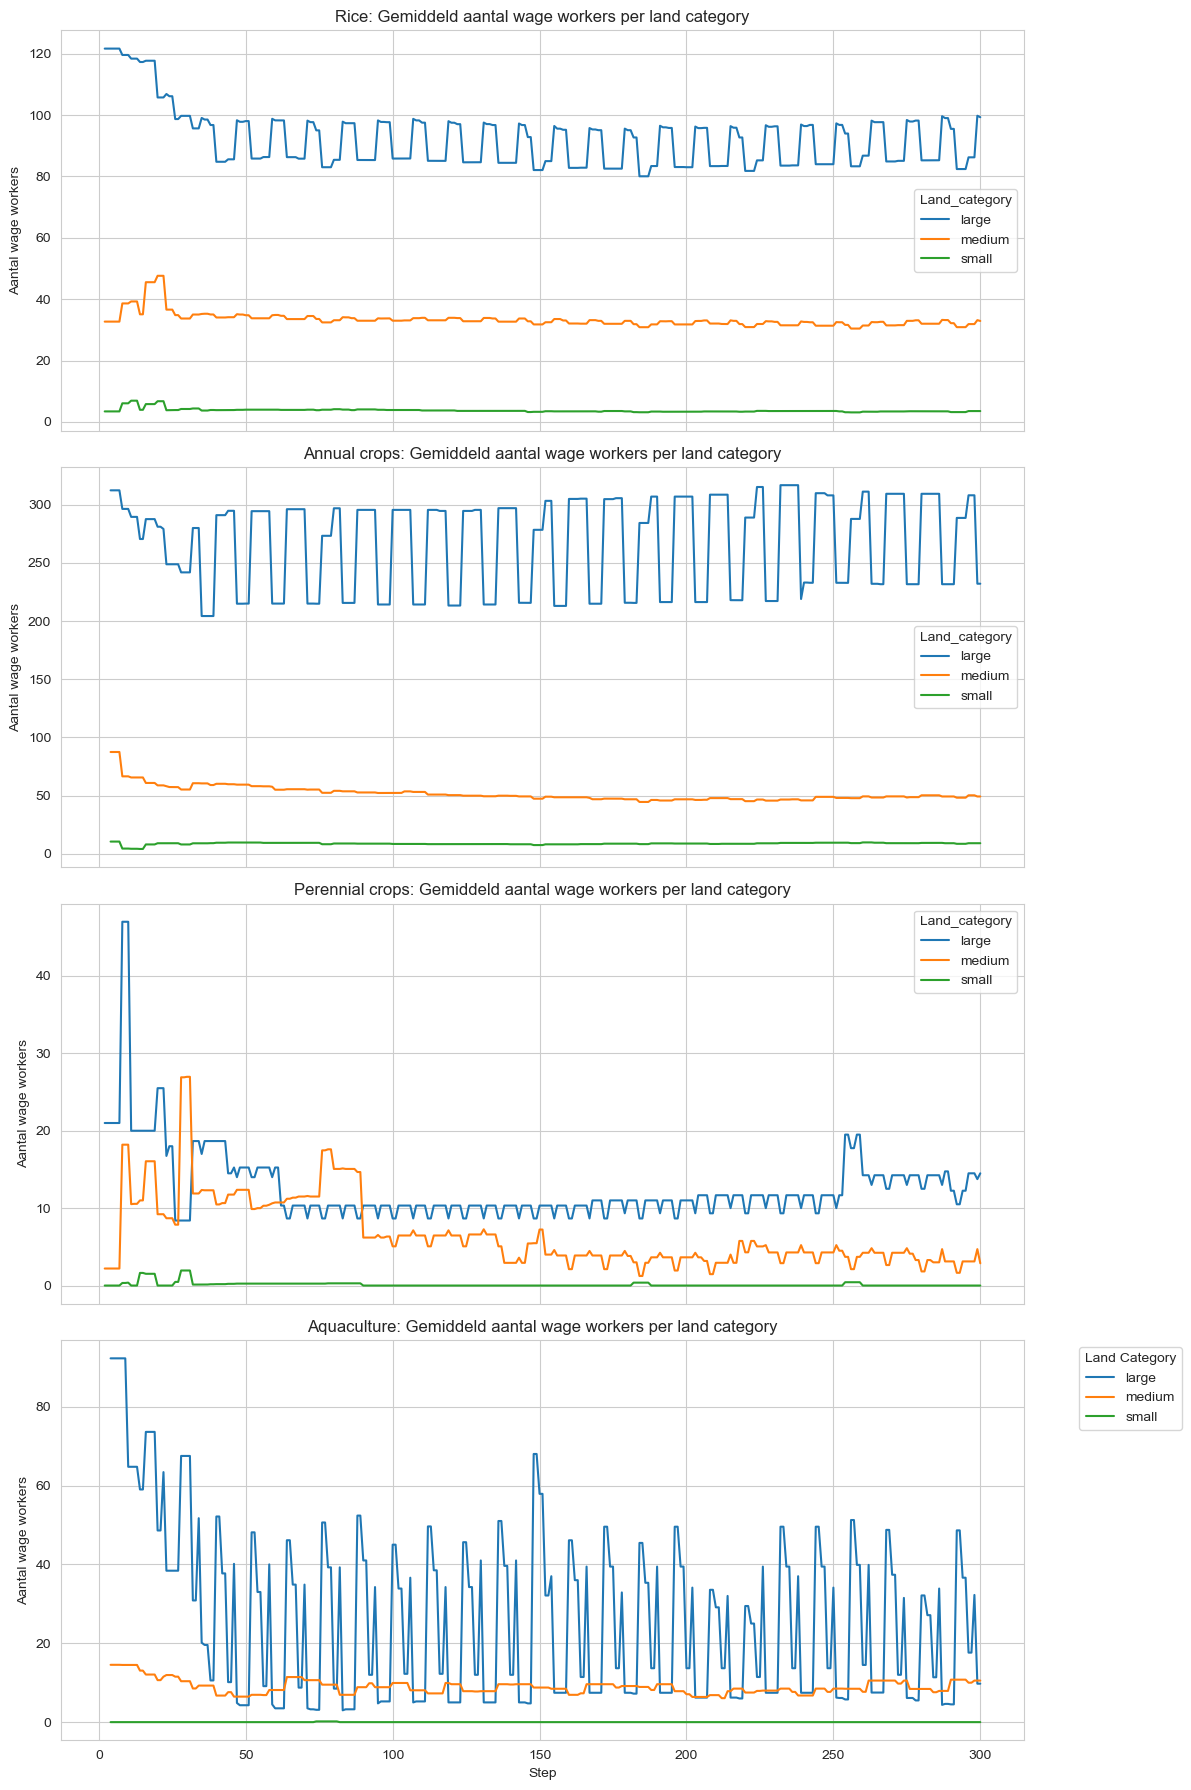

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zorg voor consistente stijl
sns.set_style("whitegrid")

# Definieer de 4 crops die je wilt plotten
crops = ["Rice", "Annual crops", "Perennial crops", "Aquaculture"]

# Maak een figure met 4 subplots (delen de x-as)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18), sharex=True)

# Loop over elke crop en bijbehorende as
for ax, crop in zip(axes, crops):
    # Filter de data per crop, en verwijder NaNs
    crop_data = ww_data1[
        (ww_data1["Crop_type"] == crop) &
        (ww_data1["Number_of_wage_workers"].notna()) &
        (ww_data1["Land_category"].notna())
    ].copy()

    # Groepeer per Step & Land_category en neem gemiddelde
    grouped = crop_data.groupby(["Step", "Land_category"])["Number_of_wage_workers"].mean().reset_index()

    # Maak de plot
    sns.lineplot(
        data=grouped,
        x="Step",
        y="Number_of_wage_workers",
        hue="Land_category",
        ax=ax
    )

    # Titels en labels
    ax.set_title(f"{crop}: Gemiddeld aantal wage workers per land category")
    ax.set_ylabel("Aantal wage workers")

# Legenda bij onderste plot
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, title="Land Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# X-label alleen onderaan
axes[-1].set_xlabel("Step")

plt.tight_layout()
plt.show()


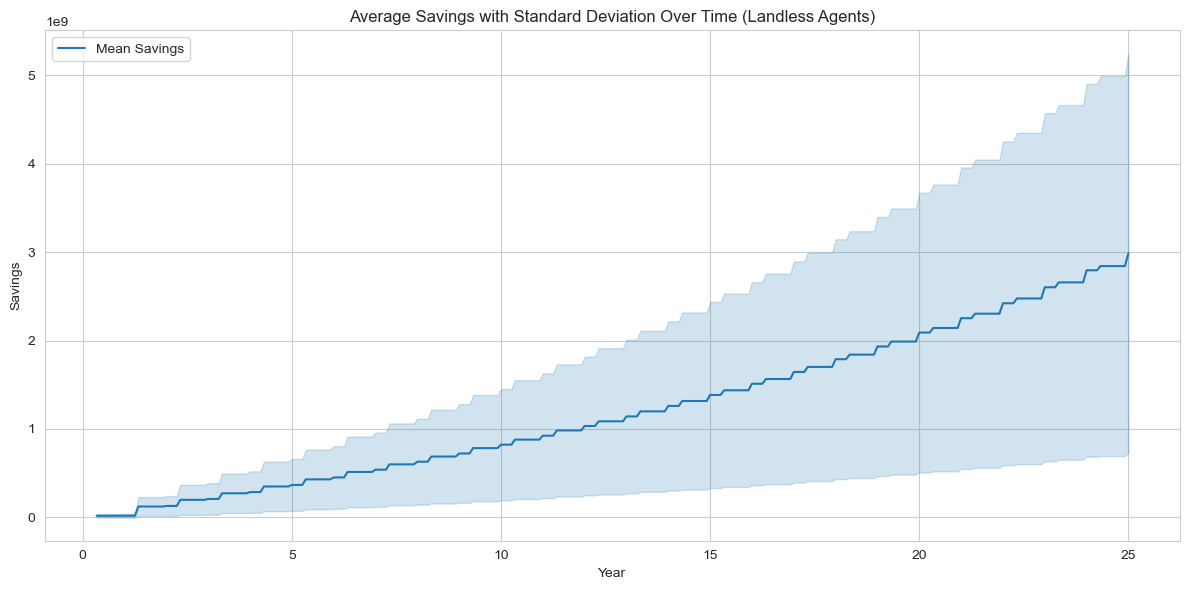

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter landless agents
landless_savings = agent_data[agent_data['too low income'].notna()].reset_index()
landless_savings['Year'] = landless_savings['Step'] / 12


# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    errorbar='sd',  
    estimator="mean",
    label="Mean Savings",
    ci="sd"  
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()



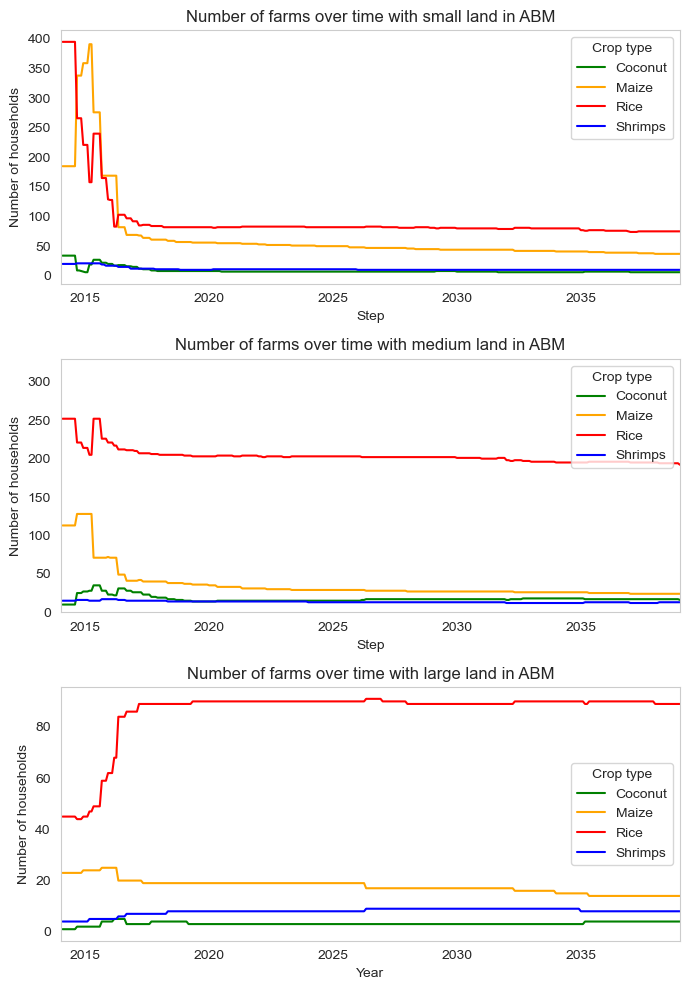

In [22]:
agent_data_crops_per_land = agent_data[agent_data['Crop_type'].notna()]
agent_data_crops_per_land

import matplotlib.pyplot as plt

crop_colors = {
    "Maize": "orange",       
    "Rice": "red",
    "Coconut": "green",     
    "Shrimps": "blue"       
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

start_year = 2014
end_year = start_year + 25

for i, category in enumerate(['small', 'medium', 'large']):
    subsets = agent_data_crops_per_land[agent_data_crops_per_land["Land_category"] == category]
    if len(subsets) > 0:
        subsets = subsets.reset_index()
        subsets = subsets.groupby(['Step', "Crop_type"]).size().reset_index(name="count")
        subsets = subsets.pivot(index="Step", columns="Crop_type", values="count").fillna(0)

        # Crop namen aanpassen
        rename_dict = {
            "Annual crops": "Maize",
            "Perennial crops": "Coconut",
            "Aquaculture": "Shrimps"
        }
        subsets.rename(columns=rename_dict, inplace=True)

        # Tijd omzetten naar jaartallen
        subsets.index = start_year + subsets.index / 12

        # Gewenste volgorde van crops
        ordered_labels = ['Coconut', 'Maize', 'Rice', 'Shrimps']
        plot_columns = [label for label in ordered_labels if label in subsets.columns]
        color_list = [crop_colors[label] for label in plot_columns]

        # Plot in gewenste volgorde
        subsets[plot_columns].plot(ax=axes[i], color=color_list)

        # Titel, labels, limieten
        axes[i].set_title(f"Number of farms over time with {category} land in ABM")
        axes[i].set_ylabel("Number of households")
        axes[i].set_xlim(start_year, end_year)
        axes[i].grid(False)

        if i == 1:
            axes[i].set_ylim(0, 330)  # Y-as limiet op middelste subplot

        # Legenda in juiste volgorde
        handles, _ = axes[i].get_legend_handles_labels()
        ordered_handles = [handles[plot_columns.index(label)] for label in plot_columns]
        axes[i].legend(ordered_handles, plot_columns, title="Crop type")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()



In [17]:
agent_data_crops_per_land

Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
1    10001            Rice        medium  2.000000e+07             NaN   
     10002            Rice         small  2.000000e+07             NaN   
     10003            Rice         small  2.000000e+07             NaN   
     10004    Annual crops         large  2.000000e+07             NaN   
     10005    Annual crops        medium  2.000000e+07             NaN   
...                    ...           ...           ...             ...   
300  11093            Rice         small  9.156151e+08             NaN   
     11094            Rice         small  1.291249e+09             NaN   
     11095            Rice        medium  2.107676e+09             NaN   
     11096            Rice         small  3.821299e+09             NaN   
     11097    Annual crops         small  7.906946e+08             NaN   

              Number_of_wage_workers  Debt ratio  ww_costs_rice  \
Step AgentID                                                      
1    10001                       NaN         NaN            NaN   
     10002                       NaN         NaN            NaN   
     10003                       NaN         NaN            NaN   
     10004                       NaN         NaN            NaN   
     10005                       NaN         NaN            NaN   
...                              ...         ...            ...   
300  11093                       6.0         0.0   1.248169e+06   
     11094                       0.0         0.0   0.000000e+00   
     11095                      29.0         0.0   6.032817e+06   
     11096                      53.0         0.0   1.102549e+07   
     11097                       2.0         0.0   1.330000e+06   

              ww_costs_maize  ww_costs_coconut  ww_costs_shrimp  \
Step AgentID                                                      
1    10001               NaN               NaN              NaN   
     10002               NaN               NaN              NaN   
     10003               NaN               NaN              NaN   
     10004               NaN               NaN              NaN   
     10005               NaN               NaN              NaN   
...                      ...               ...              ...   
300  11093      2.717173e+06               NaN              NaN   
     11094      2.717173e+06               NaN              NaN   
     11095               NaN               NaN              NaN   
     11096               NaN               NaN              NaN   
     11097      4.160563e+05               NaN              NaN   

              total_income_rice  total_income_maize  total_income_coconut  \
Step AgentID                                                                
1    10001                  NaN                 NaN                   NaN   
     10002                  NaN                 NaN                   NaN   
     10003                  NaN                 NaN                   NaN   
     10004                  NaN                 NaN                   NaN   
     10005                  NaN                 NaN                   NaN   
...                         ...                 ...                   ...   
300  11093         7.702070e+06        8.308910e+06                   NaN   
     11094         7.900531e+06        8.139895e+06                   NaN   
     11095         2.564483e+07                 NaN                   NaN   
     11096         4.391258e+07                 NaN                   NaN   
     11097         8.287006e+06        1.144740e+07                   NaN   

              total_income_shrimp    yield_rice  yield_maize  yield_coconut  \
Step AgentID                                                                  
1    10001                    NaN           NaN          NaN            NaN   
     10002                    NaN           NaN          NaN           

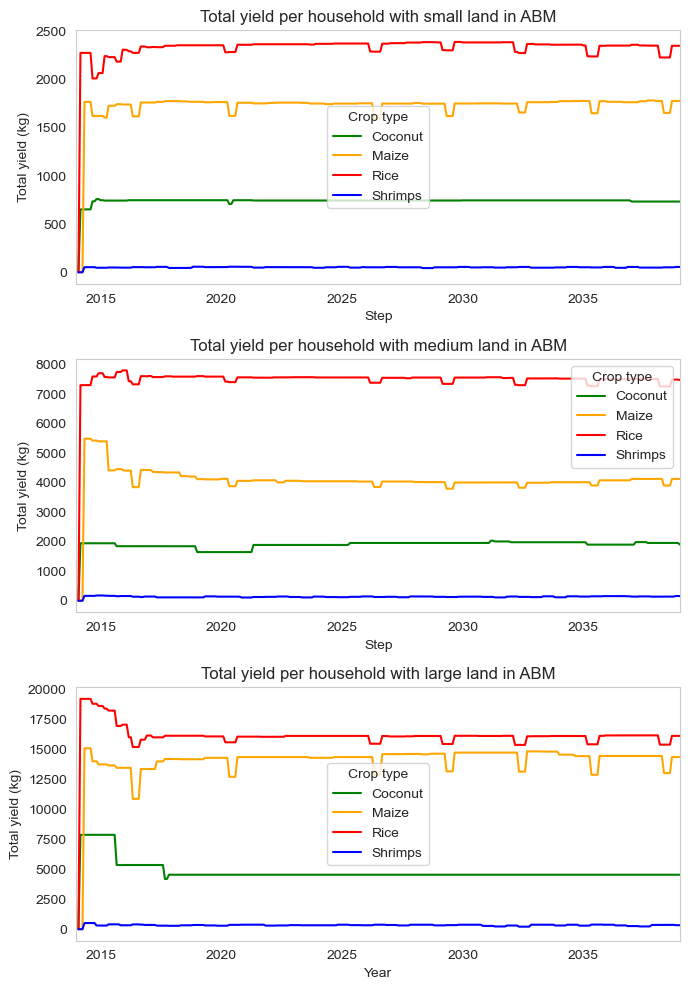

In [19]:
import matplotlib.pyplot as plt

# Filter alleen de rijen met een geldige Crop_type
agent_data_income = agent_data[agent_data['Crop_type'].notna()]

# Definieer kleuren voor elke crop
crop_colors = {
    "Maize": "orange",       
    "Rice": "red",
    "Coconut": "green",     
    "Shrimps": "blue"       
}

# Teken subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

start_year = 2014
end_year = start_year + 25

for i, category in enumerate(['small', 'medium', 'large']):
    subset = agent_data_income[agent_data_income["Land_category"] == category]

    if len(subset) > 0:
        subset = subset.reset_index()

        # Vervang Crop_type-namen
        subset['Crop_type'] = subset['Crop_type'].replace({
            "Annual crops": "Maize",
            "Perennial crops": "Coconut",
            "Aquaculture": "Shrimps"
        })

        # Voeg gewasinkomens samen in één kolom
        crop_income_columns = {
            "Rice": "yield_rice",
            "Maize": "yield_maize",
            "Coconut": "yield_coconut",
            "Shrimps": "yield_shrimp"
        }

        income_data = []
        for crop, income_col in crop_income_columns.items():
            crop_subset = subset[subset['Crop_type'] == crop].copy()
            crop_subset = crop_subset[['Step', income_col]].groupby('Step').mean()
            crop_subset.rename(columns={income_col: crop}, inplace=True)
            income_data.append(crop_subset)

        # Combineer alles op Step-index
        combined = pd.concat(income_data, axis=1).fillna(0)
        combined.index = start_year + combined.index / 12  # stap per maand → jaren

        # Gewenste volgorde voor crops
        ordered_labels = ['Coconut', 'Maize', 'Rice', 'Shrimps']
        plot_columns = [label for label in ordered_labels if label in combined.columns]
        color_list = [crop_colors[label] for label in plot_columns]

        combined[plot_columns].plot(ax=axes[i], color=color_list)

        # Plot instellingen
        axes[i].set_title(f"Total yield per household with {category} land in ABM")
        axes[i].set_ylabel("Total yield (kg)")
        axes[i].set_xlim(start_year, end_year)
        axes[i].grid(False)

          # Pas aan indien nodig

        # Legenda geforceerd in juiste volgorde
        handles, _ = axes[i].get_legend_handles_labels()
        ordered_handles = [handles[plot_columns.index(label)] for label in plot_columns]
        axes[i].legend(ordered_handles, plot_columns, title="Crop type")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.grid(False)
plt.show()


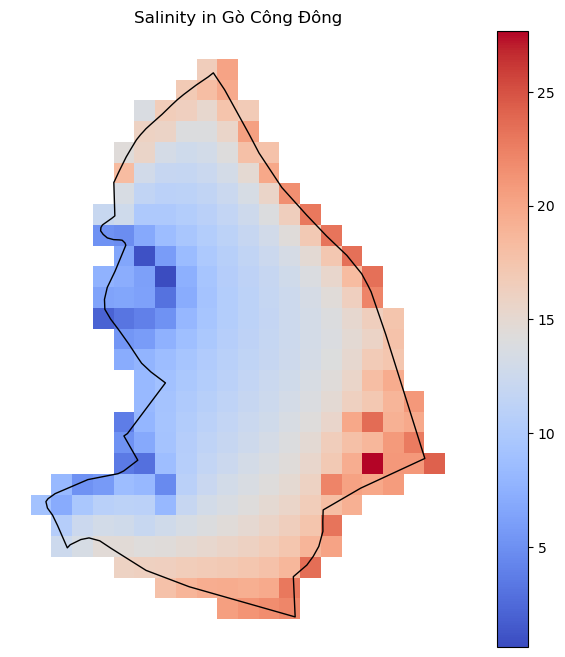

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

Aantal nodes per crop_type:
Annual crops: 29
Aquaculture: 7
Rice: 66
Perennial crops: 3
Unknown: 0
Aantal nodes per crop_type:
Annual crops: 7
Aquaculture: 7
Rice: 35
Perennial crops: 0
Unknown: 0


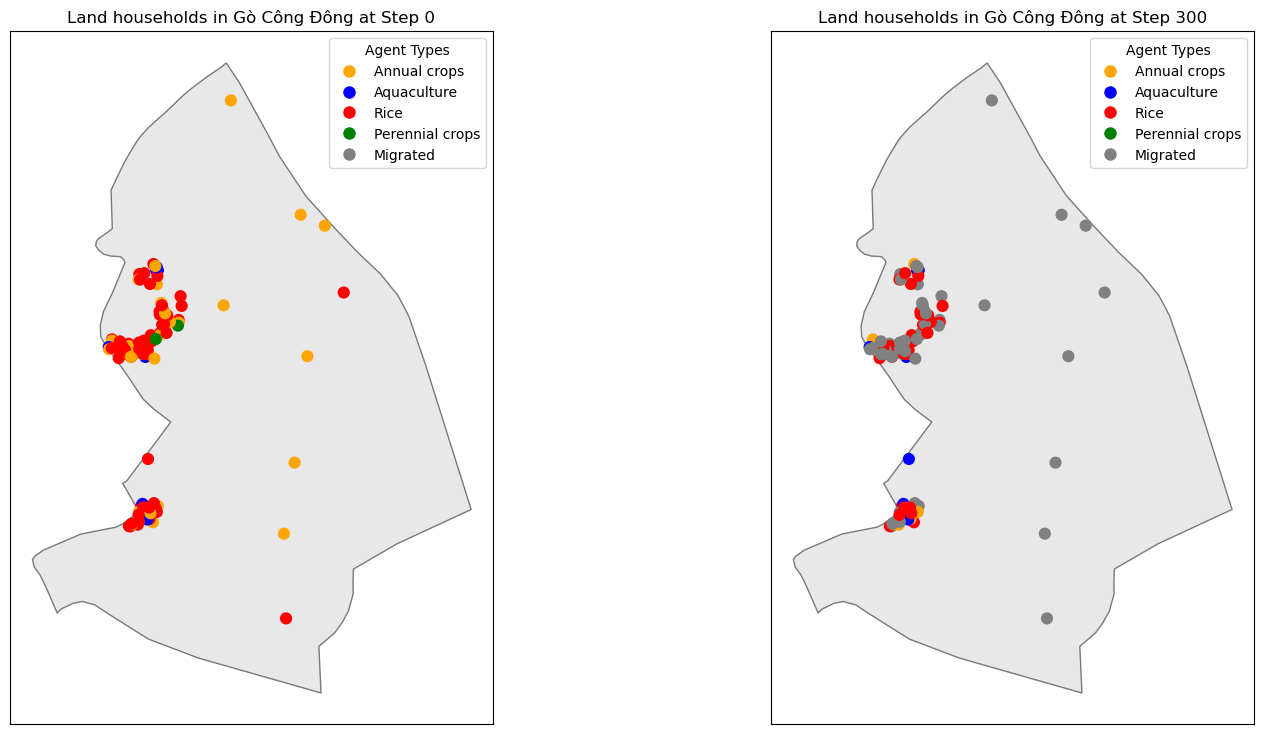

In [12]:
from Model3 import Large_land_households, Middle_land_households, Small_land_households
from collections import Counter

def plot_network(ax, model):
    ax.clear()

    # Map node_id to agent
    node_to_agent = {agent.node_id: agent for agent in model.agents if isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))}
    
    # Tellen crop_types
    crop_counts = Counter()
    for agent in node_to_agent.values():
        crop = agent.crop_type
        if crop is not None:
            crop_counts[crop] += 1
        else:
            crop_counts['Unknown'] += 1

    print("Aantal nodes per crop_type:")
    for crop_type in ["Annual crops", "Aquaculture", "Rice", "Perennial crops", "Unknown"]:
        print(f"{crop_type}: {crop_counts.get(crop_type, 0)}")

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.crop_type == "Annual crops":
                colors_to_draw.append('orange')
            elif agent.crop_type == "Aquaculture":
                colors_to_draw.append('blue')
            elif agent.crop_type == "Rice":
                colors_to_draw.append('red')
            elif agent.crop_type == "Perennial crops":
                colors_to_draw.append('green')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent


    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Annual crops')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Aquaculture')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Rice')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Perennial crops')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Land households in {model.district} at Step {model.steps}", fontsize=12)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()

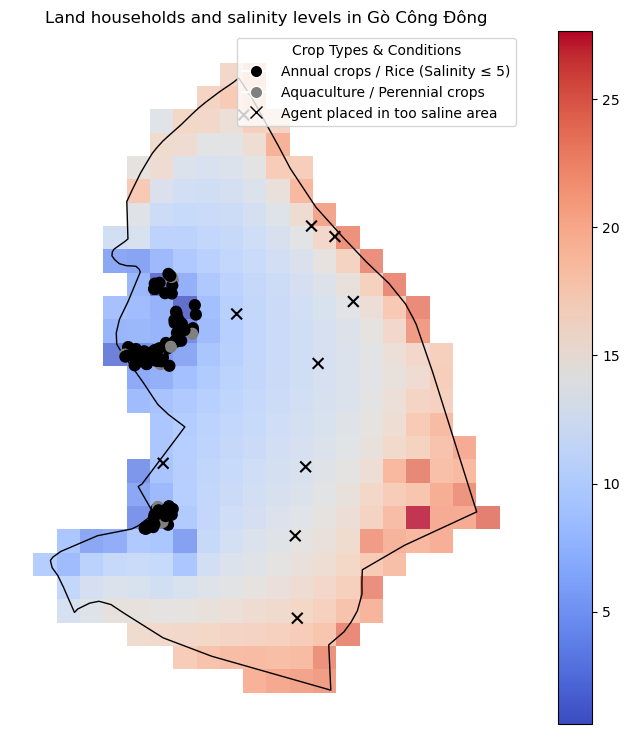

In [24]:
def plot_network_with_salinity(ax, model, salinity_threshold=5):
    ax.clear()

    # Plot salinity background
    model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", alpha=0.8, legend=True)

    # Plot district boundaries
    model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)

    # Map node_id to land agent
    node_to_agent = {
        agent.node_id: agent for agent in model.agents
        if hasattr(agent, 'node_id') and isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))
    }

    pos = nx.get_node_attributes(model.G, 'pos')

    from shapely.geometry import Point

    def get_salinity_at_pos(xy):
        point = Point(xy)
        matches = model.data_salinity[model.data_salinity.geometry.contains(point)]
        return matches.iloc[0]['Salinity'] if not matches.empty else np.nan

    markers, colors = [], []
    for node_id in model.G.nodes():
        agent = node_to_agent.get(node_id)
        xy = pos[node_id]
        salinity = get_salinity_at_pos(xy)

        # Default values
        marker = 'o'
        color = 'lightgray'

        if agent:
            crop = getattr(agent, 'crop_type', None)

            if crop in ["Annual crops", "Rice"]:
                color = 'black'
                if salinity is not None and not np.isnan(salinity) and salinity > salinity_threshold:
                    marker = 'x'  # risky crop in salty area
                else:
                    marker = 'o'  # safe area
            elif crop in ["Aquaculture", "Perennial crops"]:
                color = 'gray'
                marker = 'o'
            else:
                color = 'lightgray'
                marker = 'o'
        # else:
        #     color = 'lightgray'
        #     marker = 'o'

        colors.append(color)
        markers.append(marker)

    # Draw nodes grouped by marker type
    for marker_type in set(markers):
        node_list = [n for n, m in zip(model.G.nodes(), markers) if m == marker_type]
        node_colors = [c for c, m in zip(colors, markers) if m == marker_type]

        nx.draw_networkx_nodes(model.G, pos,
                               nodelist=node_list,
                               node_color=node_colors,
                               node_size=60,
                               node_shape=marker_type,
                               ax=ax)

    # Legend
    legend_elements = [
        mlines.Line2D([], [], marker='o', color='w', markerfacecolor='black', markersize=9, label='Annual crops / Rice (Salinity ≤ 5)'),
        
        mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=9, label='Aquaculture / Perennial crops'),
        mlines.Line2D([], [], marker='x', color='black', linestyle='None', markersize=9, label='Agent placed in too saline area'),
        # mlines.Line2D([], [], marker='o', color='w', markerfacecolor='lightgray', markersize=9, label='Other / No agent'),
    ]
    ax.legend(handles=legend_elements, loc='upper right', title='Crop Types & Conditions')
    ax.set_title(f"Land households and salinity levels in {model.district}")
    ax.axis('off')


fig, ax = plt.subplots(figsize=(9, 9))
plot_network_with_salinity(ax, initial_model_state)
plt.show()


## 10 RUNS VOOR RESULTS


In [ ]:
import copy
import pandas as pd
import random
import numpy as np

all_agent_data = []
all_model_data = []

for run in range(10):
    seed_value = run 
    random.seed(seed_value)
    np.random.seed(seed_value)

    model = RiverDeltaModel(seed=seed_value)  

    for j in range(300):
        model.step()

    agent_data_run = model.datacollector.get_agent_vars_dataframe()
    agent_data_run["Run"] = run
    all_agent_data.append(agent_data_run.reset_index())

    
    model_data_run = model.datacollector.get_model_vars_dataframe().copy()
    model_data_run['Run'] = run
    all_model_data.append(model_data_run.reset_index())


There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!


KeyboardInterrupt: 

In [ ]:
all_model_data

[     index  Average_Livelihood  Num_household_members  Migrated_households  \
 0        0            0.000000                   1000                    0   
 1        1            0.000000                   1000                    0   
 2        2            0.000000                   1000                    0   
 3        3            0.000000                   1000                    0   
 4        4            0.000000                   1000                    0   
 ..     ...                 ...                    ...                  ...   
 296    296            0.735108                    757                   81   
 297    297            0.735108                    757                   81   
 298    298            0.735108                    757                   81   
 299    299            0.735108                    757                   81   
 300    300            0.735108                    751                   81   
 
      Migrated_members  Migrated_individuals  Died

In [ ]:
agent_data_all = pd.concat(all_agent_data, ignore_index=True)
agent_data_crops = agent_data_all[agent_data_all['Crop_type'].notna()]

grouped = (
    agent_data_crops
    .groupby(['Run', 'Step', 'Crop_type', 'Land_category'])
    .size()
    .reset_index(name='count')
)

mean_std = (
    grouped
    .groupby(['Step', 'Crop_type', 'Land_category'])['count']
    .agg(['mean', 'std'])
    .reset_index()
)

model_data_all = pd.concat(all_model_data, ignore_index=True)

grouped_model = (
    model_data_all
    .groupby(['index'])[['Migrated_households', 'Migrated_individuals']]
    .agg(['mean', 'std'])
)

grouped_model.columns = ['_'.join(col).strip() for col in grouped_model.columns.values]
grouped_model = grouped_model.reset_index()
grouped_model['Year'] = grouped_model['index'] / 12  

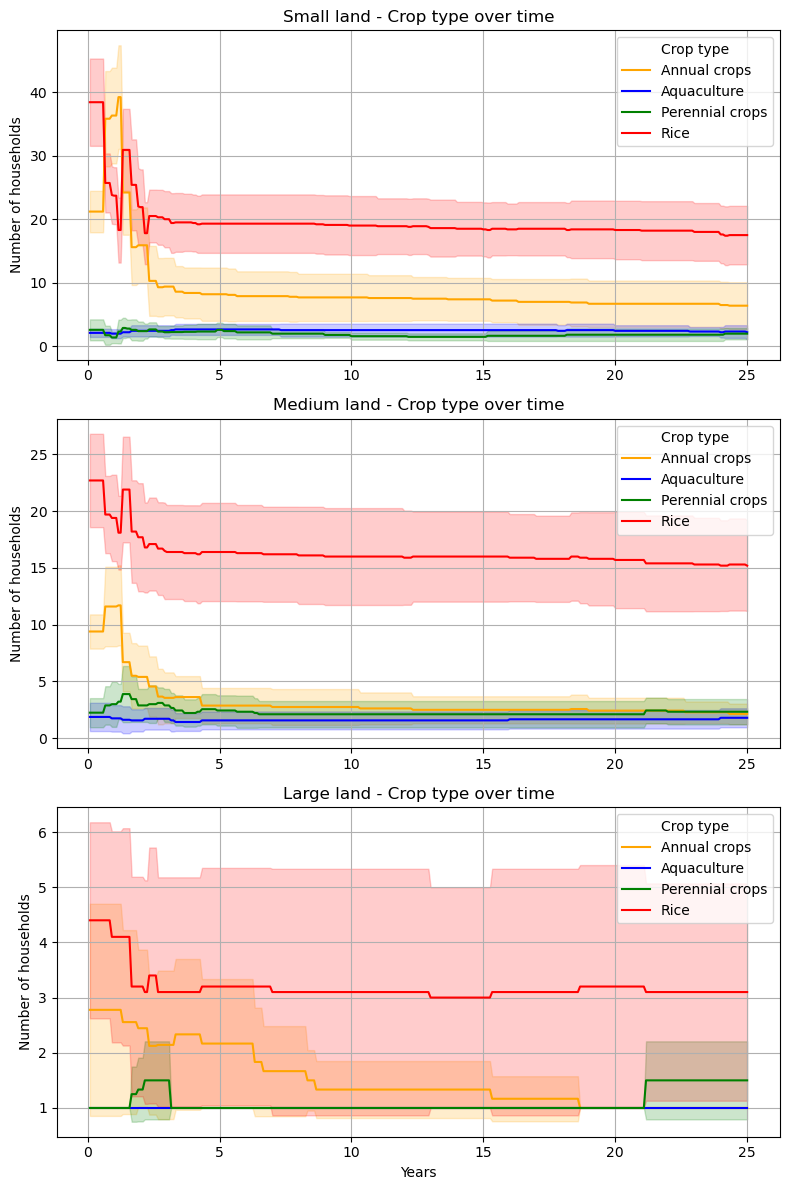

In [ ]:
import matplotlib.pyplot as plt

crop_colors = {
    "Annual crops": "orange",
    "Rice": "red",
    "Perennial crops": "green",
    "Aquaculture": "blue"
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
land_categories = ['small', 'medium', 'large']

for i, category in enumerate(land_categories):
    subset = mean_std[mean_std['Land_category'] == category]

    for crop in subset['Crop_type'].unique():
        crop_data = subset[subset['Crop_type'] == crop]
        steps = crop_data['Step'] / 12 

        axes[i].plot(steps, crop_data['mean'], label=crop, color=crop_colors.get(crop, None))
        axes[i].fill_between(
            steps,
            crop_data['mean'] - crop_data['std'],
            crop_data['mean'] + crop_data['std'],
            color=crop_colors.get(crop, None),
            alpha=0.2
        )

    axes[i].set_title(f"{category.capitalize()} land - Crop type over time")
    axes[i].set_ylabel("Number of households")
    axes[i].legend(title="Crop type")
    axes[i].grid(True)

axes[-1].set_xlabel("Years")
plt.tight_layout()
plt.show()


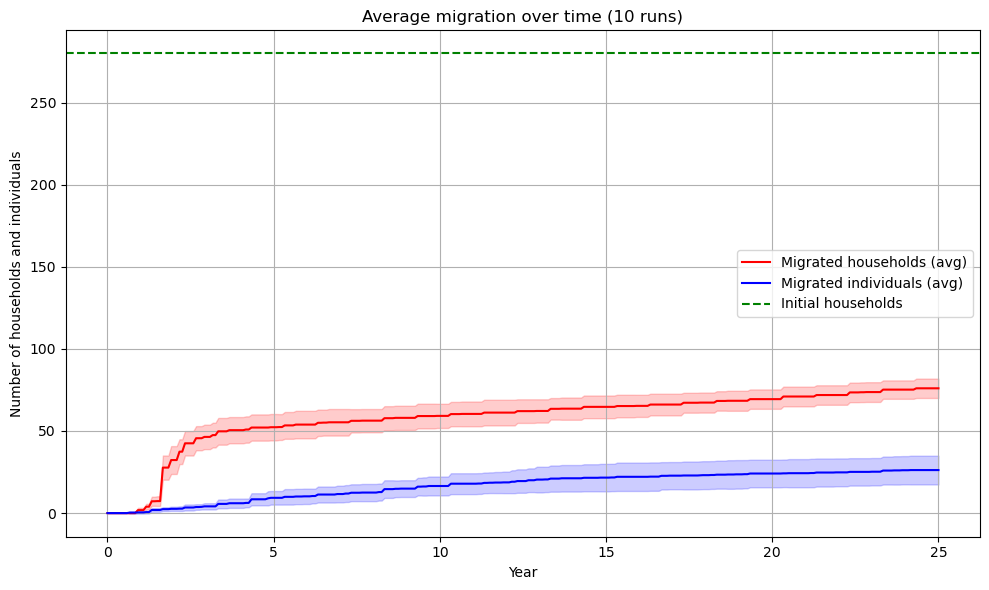

In [ ]:
migrated_data = grouped_model

start_households = model.start_households  

plt.figure(figsize=(10, 6))

plt.plot(migrated_data['Year'], migrated_data['Migrated_households_mean'], label='Migrated households (avg)', color='red')
plt.fill_between(
    migrated_data['Year'],
    migrated_data['Migrated_households_mean'] - migrated_data['Migrated_households_std'],
    migrated_data['Migrated_households_mean'] + migrated_data['Migrated_households_std'],
    color='red',
    alpha=0.2
)

plt.plot(migrated_data['Year'], migrated_data['Migrated_individuals_mean'], label='Migrated individuals (avg)', color='blue')
plt.fill_between(
    migrated_data['Year'],
    migrated_data['Migrated_individuals_mean'] - migrated_data['Migrated_individuals_std'],
    migrated_data['Migrated_individuals_mean'] + migrated_data['Migrated_individuals_std'],
    color='blue',
    alpha=0.2
)

plt.axhline(y=start_households, color='green', linestyle='--', label='Initial households')

plt.xlabel('Year')
plt.ylabel('Number of households and individuals')
plt.title('Average migration over time (10 runs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
grouped_model

,Step,Migrated_households_mean,Migrated_households_std,Migrated_individuals_mean,Migrated_individuals_std,Year
0,1.0,NaN,NaN,NaN,NaN,0.083333
1,2.0,NaN,NaN,NaN,NaN,0.166667
2,3.0,NaN,NaN,NaN,NaN,0.250000
3,4.0,NaN,NaN,NaN,NaN,0.333333
4,5.0,NaN,NaN,NaN,NaN,0.416667
...,...,...,...,...,...,...
295,296.0,NaN,NaN,NaN,NaN,24.666667
296,297.0,NaN,NaN,NaN,NaN,24.750000
297,298.0,NaN,NaN,NaN,NaN,24.833333
298,299.0,NaN,NaN,NaN,NaN,24.916667


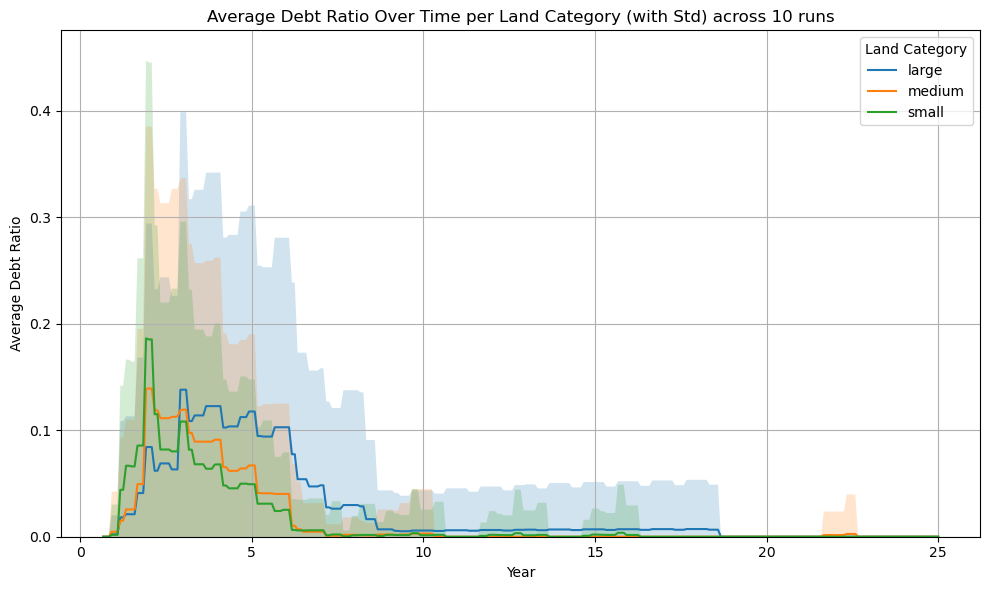

In [ ]:
debt_data = agent_data_all.copy()
debt_data = debt_data[debt_data['Debt ratio'].notna()]


grouped = (
    debt_data
    .groupby(['Step', 'Land_category'])['Debt ratio']
    .agg(['mean', 'std'])
    .reset_index()
)


grouped['Year'] = grouped['Step'] / 12

mean_pivot = grouped.pivot(index='Year', columns='Land_category', values='mean')
std_pivot = grouped.pivot(index='Year', columns='Land_category', values='std')


plt.figure(figsize=(10, 6))

for category in mean_pivot.columns:
    plt.plot(mean_pivot.index, mean_pivot[category], label=category)
    plt.fill_between(
        mean_pivot.index,
        mean_pivot[category] - std_pivot[category],
        mean_pivot[category] + std_pivot[category],
        alpha=0.2
    )

plt.title("Average Debt Ratio Over Time per Land Category (with Std) across 10 runs")
plt.xlabel("Year")
plt.ylabel("Average Debt Ratio")
plt.ylim(bottom=0)
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()


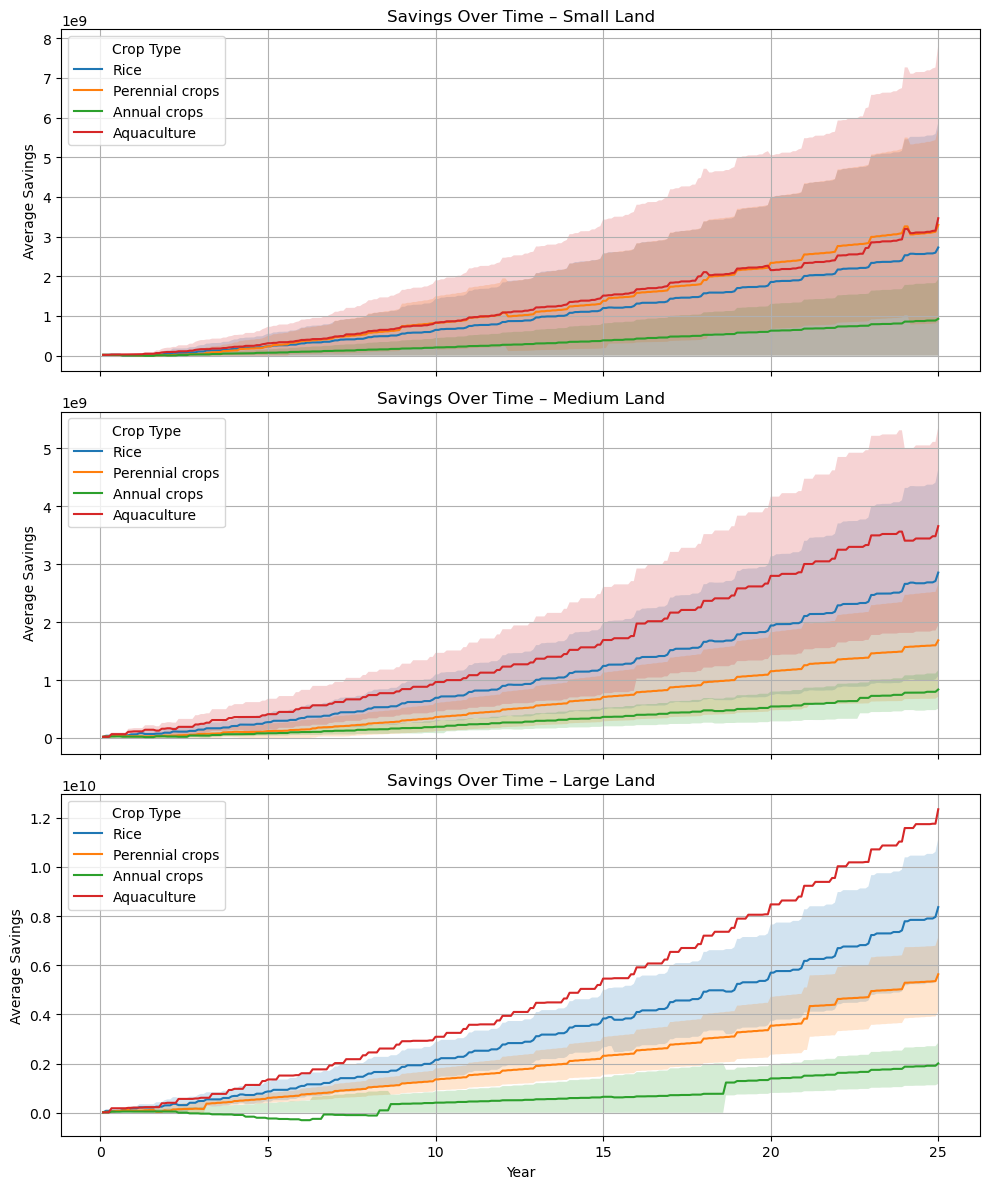

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_savings = agent_data_all.copy()  
df_filtered = df_savings.dropna(subset=['Crop_type', 'Land_category', 'Savings'])

df_filtered['Year'] = df_filtered['Step'] / 12


land_categories = ['small', 'medium', 'large']
crop_types = ['Rice', 'Perennial crops', 'Annual crops', 'Aquaculture']


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

for i, land in enumerate(land_categories):
    ax = axes[i]
    df_land = df_filtered[df_filtered['Land_category'] == land]
    
    for crop in crop_types:
        df_crop = df_land[df_land['Crop_type'] == crop]
        if df_crop.empty:
            continue

        grouped = df_crop.groupby('Year')['Savings']
        mean = grouped.mean()
        std = grouped.std()

        
        ax.plot(mean.index, mean.values, label=crop)
        ax.fill_between(
            mean.index,
            np.maximum(0, mean - std),  
            mean + std,
            alpha=0.2
        )
    
    ax.set_title(f"Savings Over Time – {land.capitalize()} Land")
    ax.set_ylabel("Average Savings")
    ax.grid(True)
    ax.legend(title="Crop Type")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


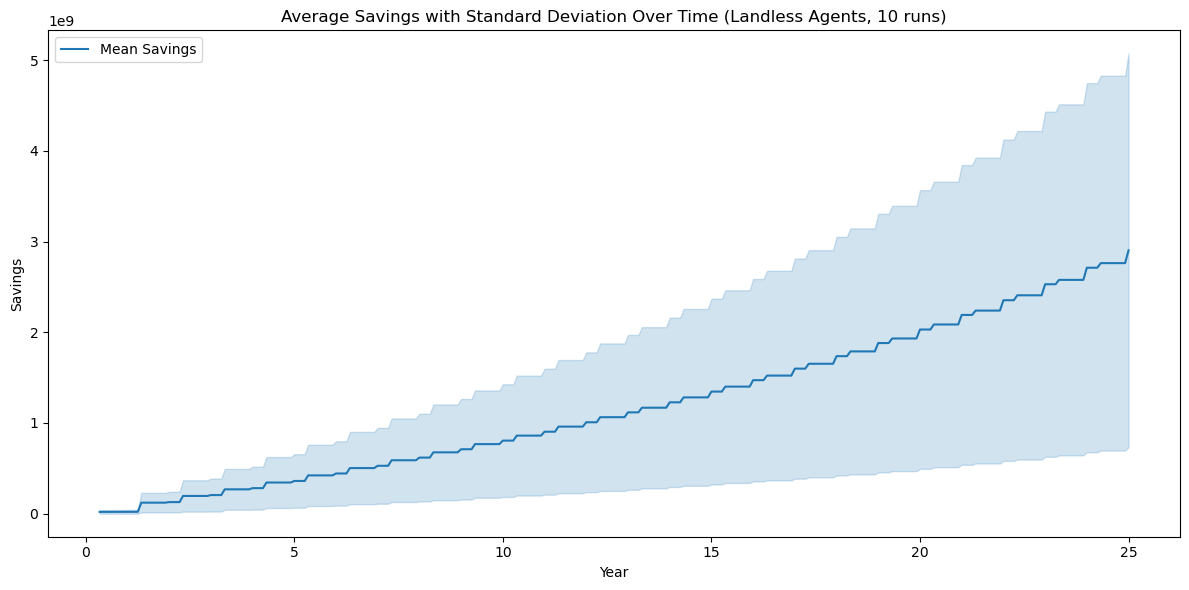

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

agent_data_all = pd.concat(all_runs, ignore_index=True)

landless_savings = agent_data_all[agent_data_all['too low income'].notna()].copy()
landless_savings['Year'] = landless_savings['Step'] / 12

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    estimator='mean',    
    ci='sd',             
    label="Mean Savings"
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents, 10 runs)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()
